In [1]:
%load_ext autoreload
%autoreload 2

# Check Observables

We check the observables for different lattice sizes of the $\mathbb{Z}_2$ model changing the Hamiltonian parameter $g$.

$$ H = -g\sum_{i}\sigma_i^x -\frac{1}{g} \sum_{i}\square_i^{Plaquette} $$

In [2]:
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
import matplotlib as mpl

from qs_mps.utils import create_sequential_colors, binders_cumul

# default parameters of the plot layout
plt.rcParams["text.usetex"] = True  # use latex
plt.rcParams["font.size"] = 13
plt.rcParams["figure.dpi"] = 300
plt.rcParams["figure.constrained_layout.use"] = True

model = "Z2_dual"
path = "mac"
# cx = [3,37]
# cy = [3,3]
cx = None
cy = None

if model == "Ising":
    model_path = "0_ISING"

elif model == "Z2_dual":
    model_path = "1_Z2"
    param_label = "h"
    boundcond = "pbc"
    if cx == None:
        sector = "vacuum_sector"
    else:
        sector = f"{len(cx)}_particle(s)_sector"

elif model == "ANNNI":
    model_path = "2_ANNNI"

elif model == "Cluster":
    model_path = "3_CLUSTER"
else:
    raise SyntaxError("Model not valid. Choose among 'Ising', 'Z2', 'ANNNI', 'Cluster'")
# take the path and precision to save files
# if we want to save the tensors we save them locally because they occupy a lot of memory
if path == "pc":
    parent_path = f"G:/My Drive/projects/{model_path}"
    path_tensor = f"D:/code/projects/{model_path}"
    path_rdms = "C:/Users/HP/Desktop/fidelity-phase-tran"
elif path == "mac":
    parent_path = f"/Users/fradm98/Google Drive/My Drive/projects/{model_path}"
    path_tensor = f"/Users/fradm98/Desktop/projects/{model_path}"
    path_rdms = "/Users/fradm98/Desktop/fidelity-phase-tran"
elif path == "marcos":
    parent_path = f"/Users/fradm/Google Drive/My Drive/projects/{model_path}"
    path_tensor = f"/Users/fradm/Desktop/projects/{model_path}"

## Observables with different Bond Dimensions $\chi$

### 1. t'Hooft String

In [4]:
def plot_thooft_string_lattice(L, l, chis, h_i, h_f, npoints, lx, ly, cx, cy):
    hs = np.linspace(h_i,h_f,npoints)
    colors = create_sequential_colors(len(chis))
    strings = []
    for i, bond_dim in enumerate(chis):
        string = np.load(f"{parent_path}/results/thooft/thooft_string_first_moment_{lx}-{ly}_horizontal_Z2_dual_direct_lattice_{l}x{L}_{sector}_bc_{boundcond}_{cx}-{cy}_h_{h_i}-{h_f}_delta_{npoints}_chi_{bond_dim}.npy")
        strings.append(string)
        plt.plot(hs, string, color=colors[i], label=f"D={bond_dim}")
    plt.title(f"t'Hooft String of $Z_2$ direct lattice ${l}$x${L}$")
    plt.legend()
    plt.savefig(f"{parent_path}/figures/thooft/thooft_string_first_moment_{lx}-{ly}_horizontal_Z2_dual_direct_lattice_{l}x{L}_{sector}_bc_{boundcond}_{cx}-{cy}_h_{h_i}-{h_f}_delta_{npoints}_chi_{chis}.png")
    return strings

def plot_thooft_string_lattice_charges(L, l, bond_dim, h_i, h_f, npoints, lx, ly, cxs, cy):
    hs = np.linspace(h_i,h_f,npoints)
    colors = create_sequential_colors(len(cxs))
    strings = []
    for i, cx in enumerate(cxs):
        string = np.load(f"{parent_path}/results/thooft/thooft_string_first_moment_{lx}-{ly}_horizontal_Z2_dual_direct_lattice_{l}x{L}_{sector}_bc_{boundcond}_{cx}-{cy}_h_{h_i}-{h_f}_delta_{npoints}_chi_{bond_dim}.npy")
        strings.append(string)
        string_length = int(np.abs(cx[1] - cx[0]))
        plt.plot(hs, string, color=colors[i], label=f"R={string_length}")
    plt.title(f"t'Hooft String of $Z_2$ direct lattice ${l}$x${L}$")
    plt.legend()
    plt.savefig(f"{parent_path}/figures/thooft/thooft_string_first_moment_{lx}-{ly}_horizontal_Z2_dual_direct_lattice_{l}x{L}_{sector}_bc_{boundcond}_{cx}-{cy}_h_{h_i}-{h_f}_delta_{npoints}_chi_{bond_dim}.png")
    return strings

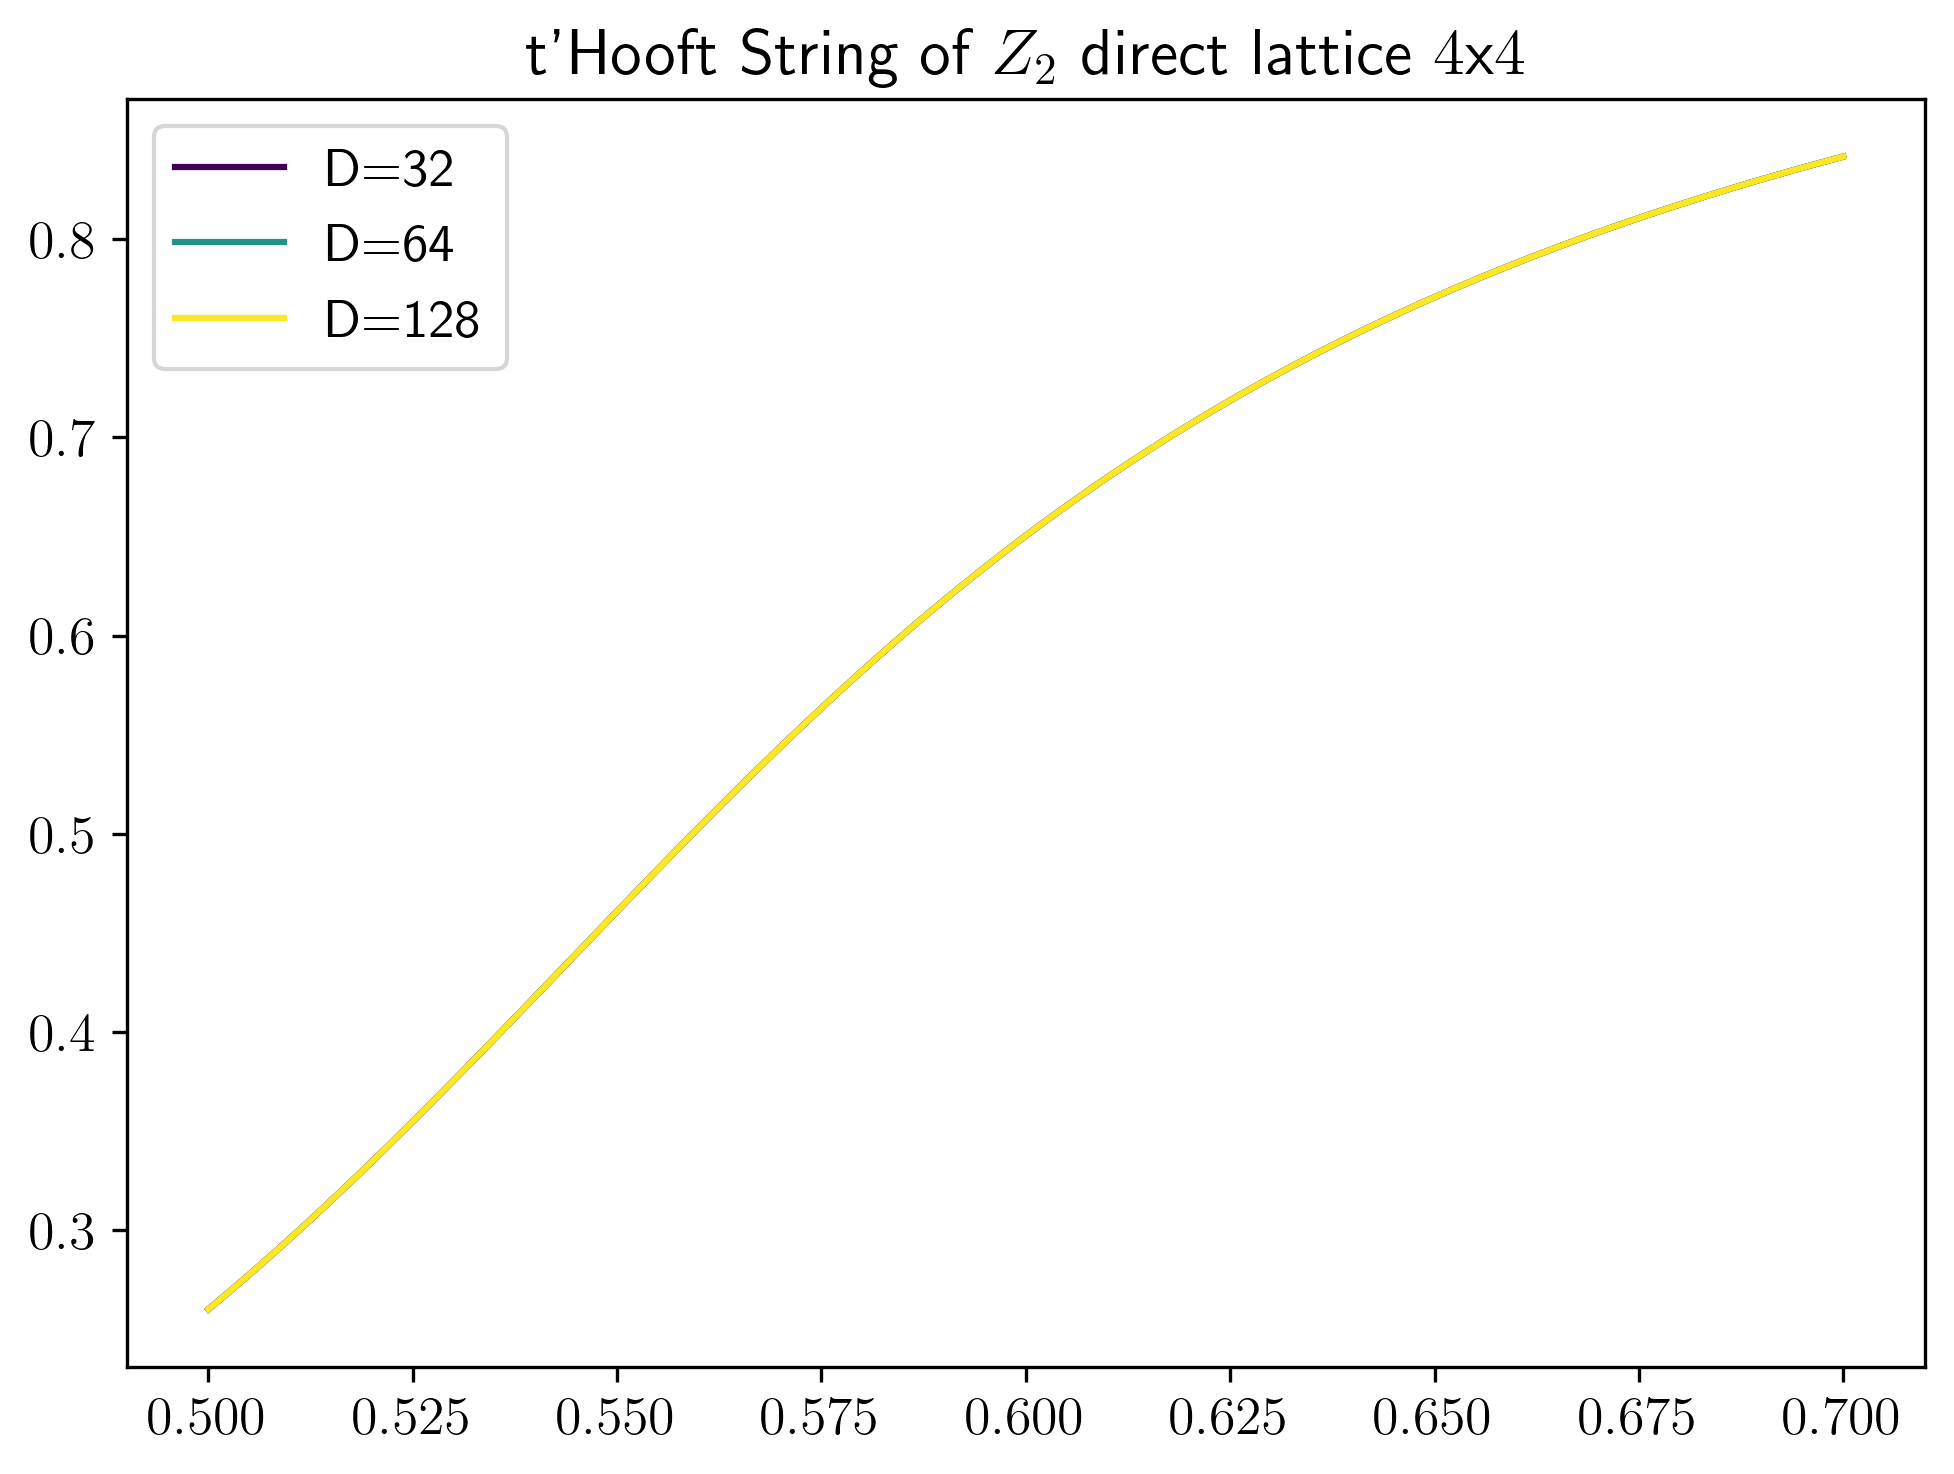

In [5]:
# # 6x20 test diff bond dim
# L, l, h_i, h_f, npoints, lx, ly = 20, 6, 0.5, 1.5, 10, 10, 2 
# chis = [4, 8, 16, 32, 64, 128]

# # 6x6 test diff bond dim
# L, l, h_i, h_f, npoints, lx, ly = 6, 6, 0.4, 0.7, 50, 2, 2 
# chis = [4, 16, 64, 128, 512]

# 7x7 test diff bond dim
L, l, h_i, h_f, npoints, lx, ly = 7, 7, 0.5, 0.6, 51, 3, 3 
chis = [4, 16, 64, 128]

# 4x4 test diff bond dim
L, l, h_i, h_f, npoints, lx, ly = 4, 4, 0.5, 0.7, 101, 1, 1 
chis = [32, 64, 128]
strings = plot_thooft_string_lattice(L,l,chis,h_i,h_f,npoints,lx,ly,cx,cy)

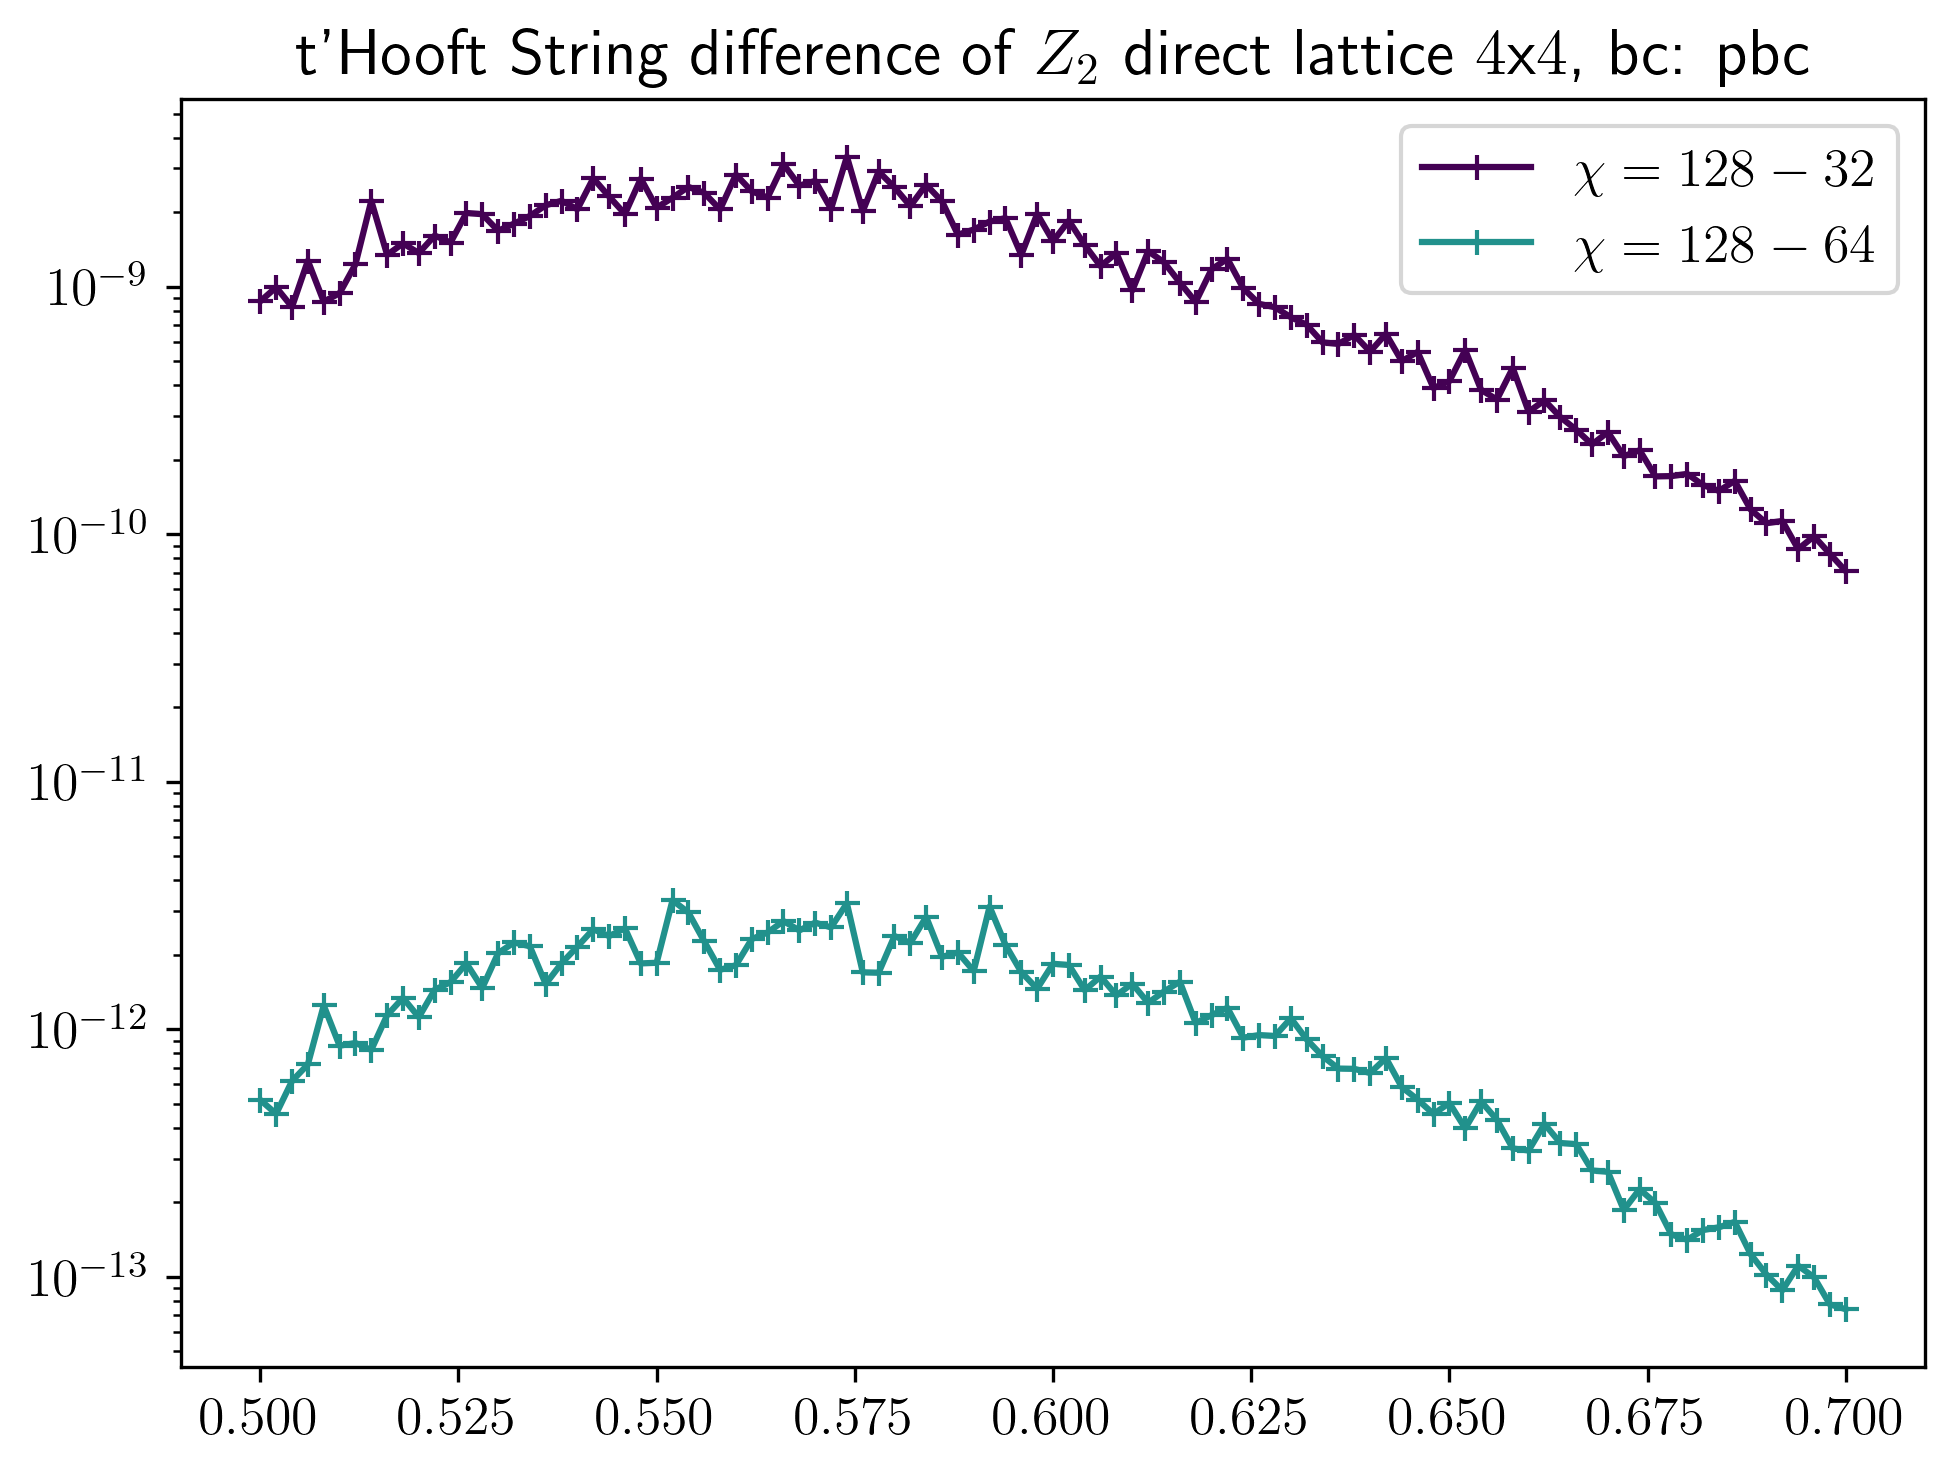

In [6]:
# plot difference between curves
hs = np.linspace(h_i,h_f,npoints)

colors = create_sequential_colors(len(chis))
for i, chi in enumerate(chis):
    if chi == chis[-1]:
        break
    else:
        diffs = np.abs(np.asarray(strings[-1])-np.asarray(strings[i]))
        plt.plot(hs, diffs, color=colors[i], marker='+', label=f"$\chi={chis[-1]}-{chis[i]}$")
plt.title(f"t'Hooft String difference of $Z_2$ direct lattice ${l}$x${L}$, bc: {boundcond}")
plt.yscale('log')
plt.legend();
plt.savefig(f"{parent_path}/figures/thooft/thooft_string_difference_first_moment_{lx}-{ly}_horizontal_Z2_dual_direct_lattice_{l}x{L}_{sector}_bc_{boundcond}_{cx}-{cy}_h_{h_i}-{h_f}_delta_{npoints}_chi_{chis}.png")


### t'Hooft string with different charges, same $\chi$

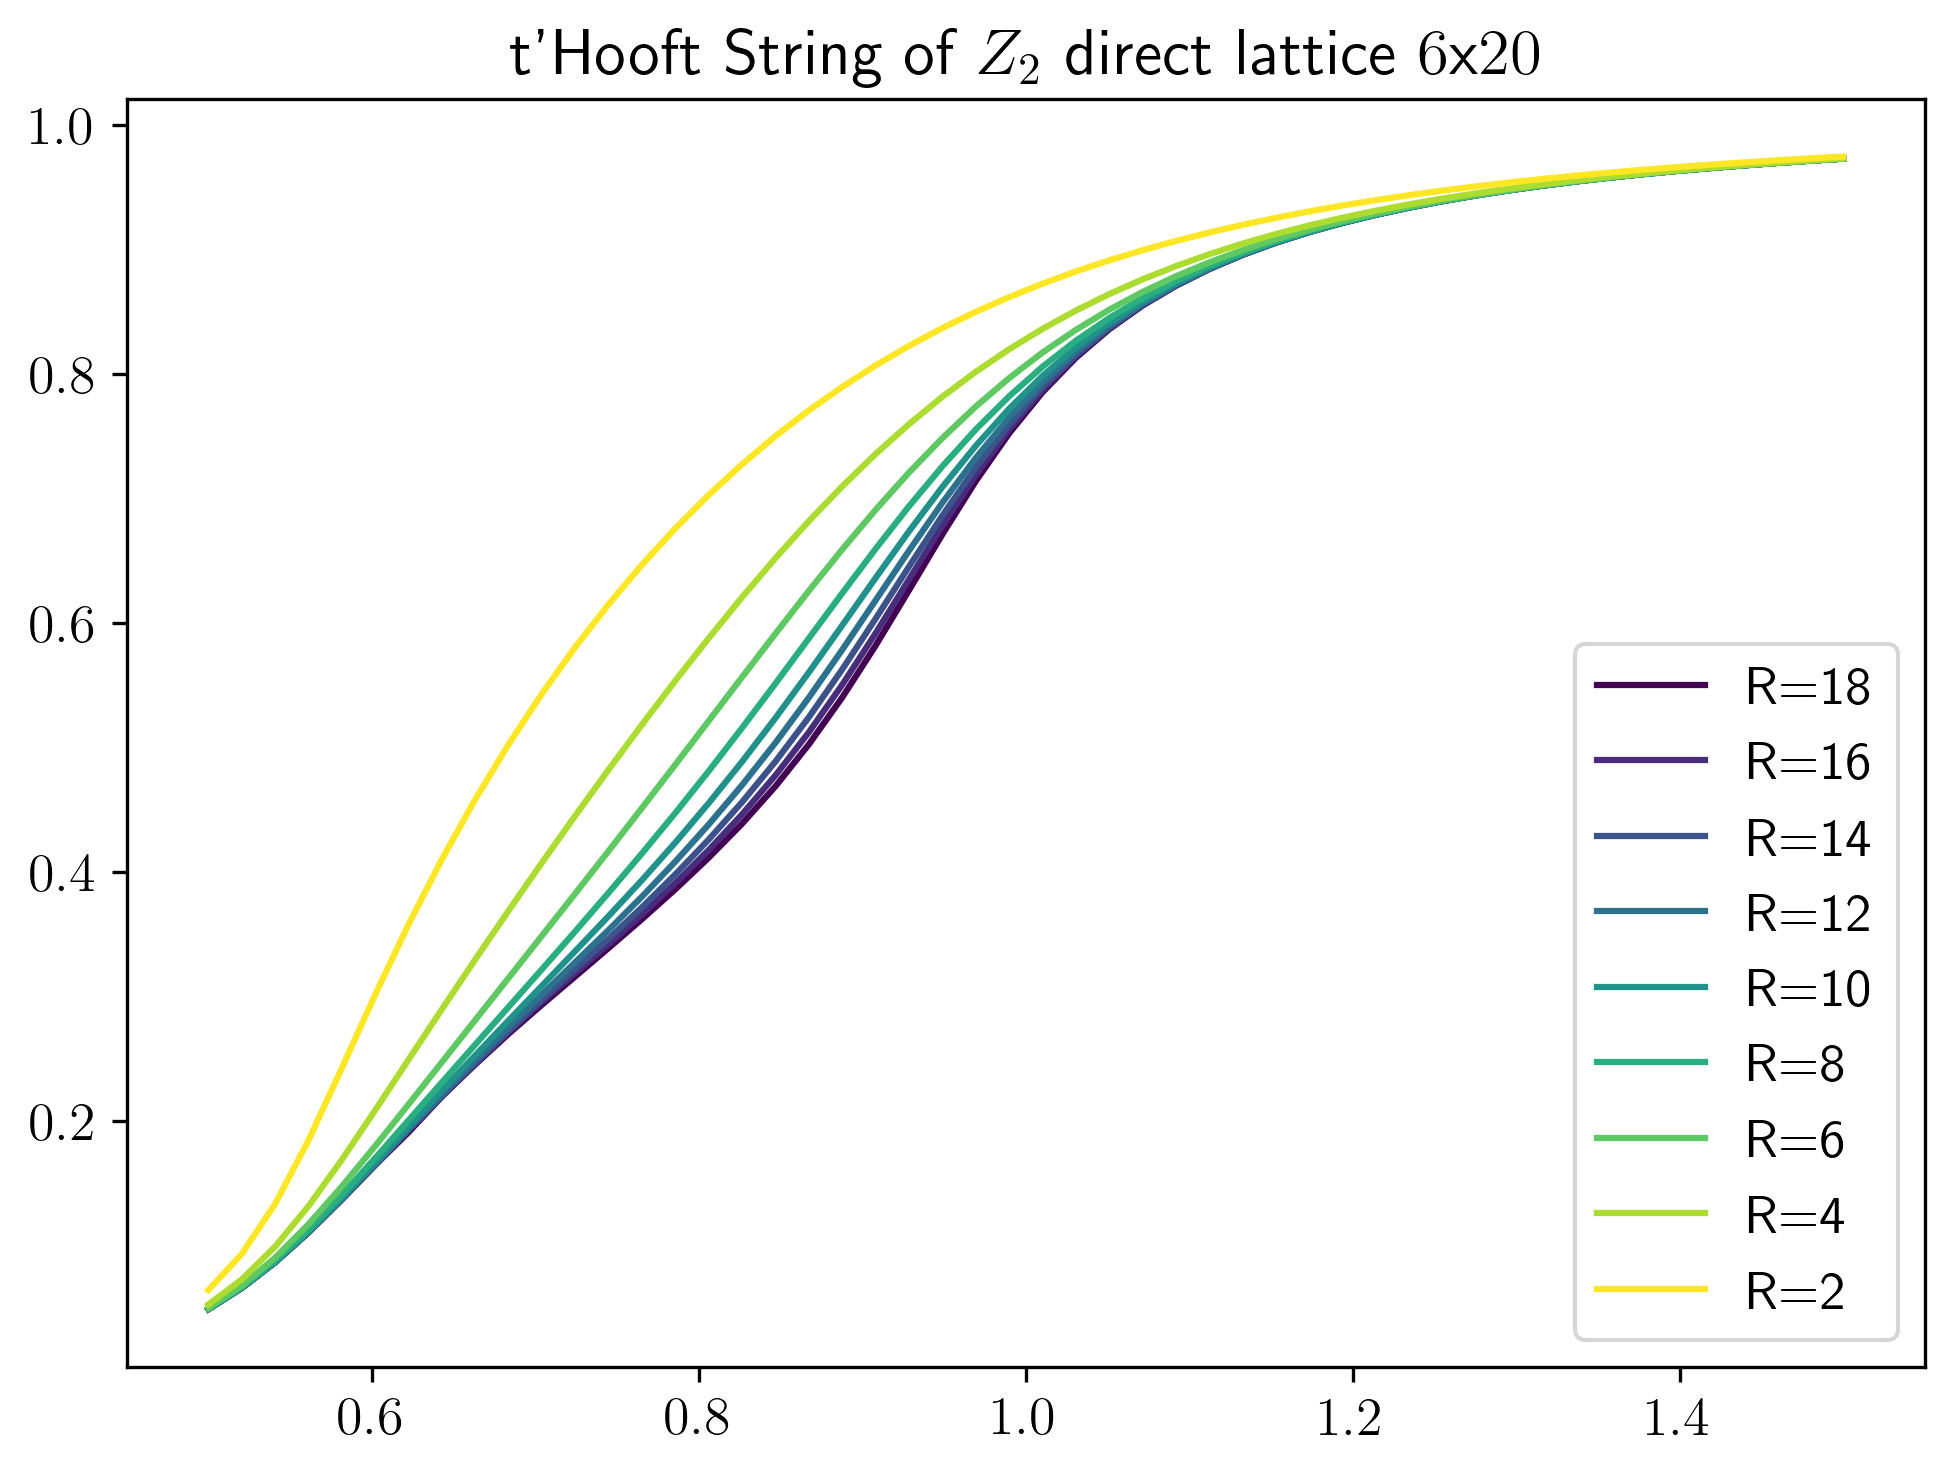

In [4]:
chi = 16
# cxs = [[3,37],[4,36],[5,35],[6,34],[7,33],[8,32],[9,31],[10,30]]
cxs = [[1,19],[2,18],[3,17],[4,16],[5,15],[6,14],[7,13],[8,12],[9,11]]
cy = [3,3]
L = 20
l = 6
h_i = 0.5
h_f = 1.5
lx = 10
ly = 2
npoints = 50
strings = plot_thooft_string_lattice_charges(L,l,chi,h_i,h_f,npoints,lx,ly,cxs,cy)

### Checking symmetries of the OBC

In [ ]:
def load_string(loop_sites):
    lx, ly = loop_sites
    def string_fn(**kwparams):
        h_i = kwparams.get('h_i')
        h_f = kwparams.get('h_f')
        npoints = kwparams.get('npoints')
        cx = kwparams.get('cx', None)
        cy = kwparams.get('cy', None)
        sector = kwparams.get('sector', 'vacuum_sector')
        parent_path = kwparams.get('parent_path')
        L = kwparams.get('L')
        l = L
        chi = kwparams.get('chi')
        return np.load(f"{parent_path}/results/thooft/thooft_string_first_moment_{lx}-{ly}_horizontal_Z2_dual_direct_lattice_{l}x{L}_{sector}_bc_{boundcond}_{cx}-{cy}_h_{h_i}-{h_f}_delta_{npoints}_chi_{chi}.npy")
    return string_fn

def compare_strings(L, ref_site):
    lx, ly = ref_site
    lx_inv = L-1 - lx
    ly_inv = L-1 - ly
    if L//2 == lx:
        print("On the vertical symmetry axis of the lattice")
    if L//2 == ly:
        print("On the horizontal symmetry axis of the lattice")

    string1 = load_string((lx, ly))
    string2 = load_string((lx_inv, ly_inv))
    string3 = load_string((lx_inv, ly))
    string4 = load_string((lx, ly_inv))
    def compare_strings_fn(**kwparams):
        return string1(**kwparams), string2(**kwparams), string3(**kwparams), string4(**kwparams)
    return compare_strings_fn

def plot_compare_strings(ref_site, params: dict, *args, **kwargs):
    L = params.get('L')
    strings = compare_strings(L, ref_site)(**params)
    hs = np.linspace(params.get('h_i'), params.get('h_f'), params.get('npoints'))
    labels = ("ref site", "xy inv", "x inv", "y inv")
    for string, label in zip(strings, labels):
        plt.plot(hs, string, *args, label=label, **kwargs)
    plt.legend()

In [37]:
L = 4
chi = 64
ref_site = (1, 1)
h_i = 0.5
h_f = 0.6
npoints = 101
parent_path="/Users/fradm/Google Drive/My Drive/projects/1_Z2"
params = dict(L=L, chi=chi, h_i=h_i, h_f=h_f, npoints=npoints, parent_path=parent_path)

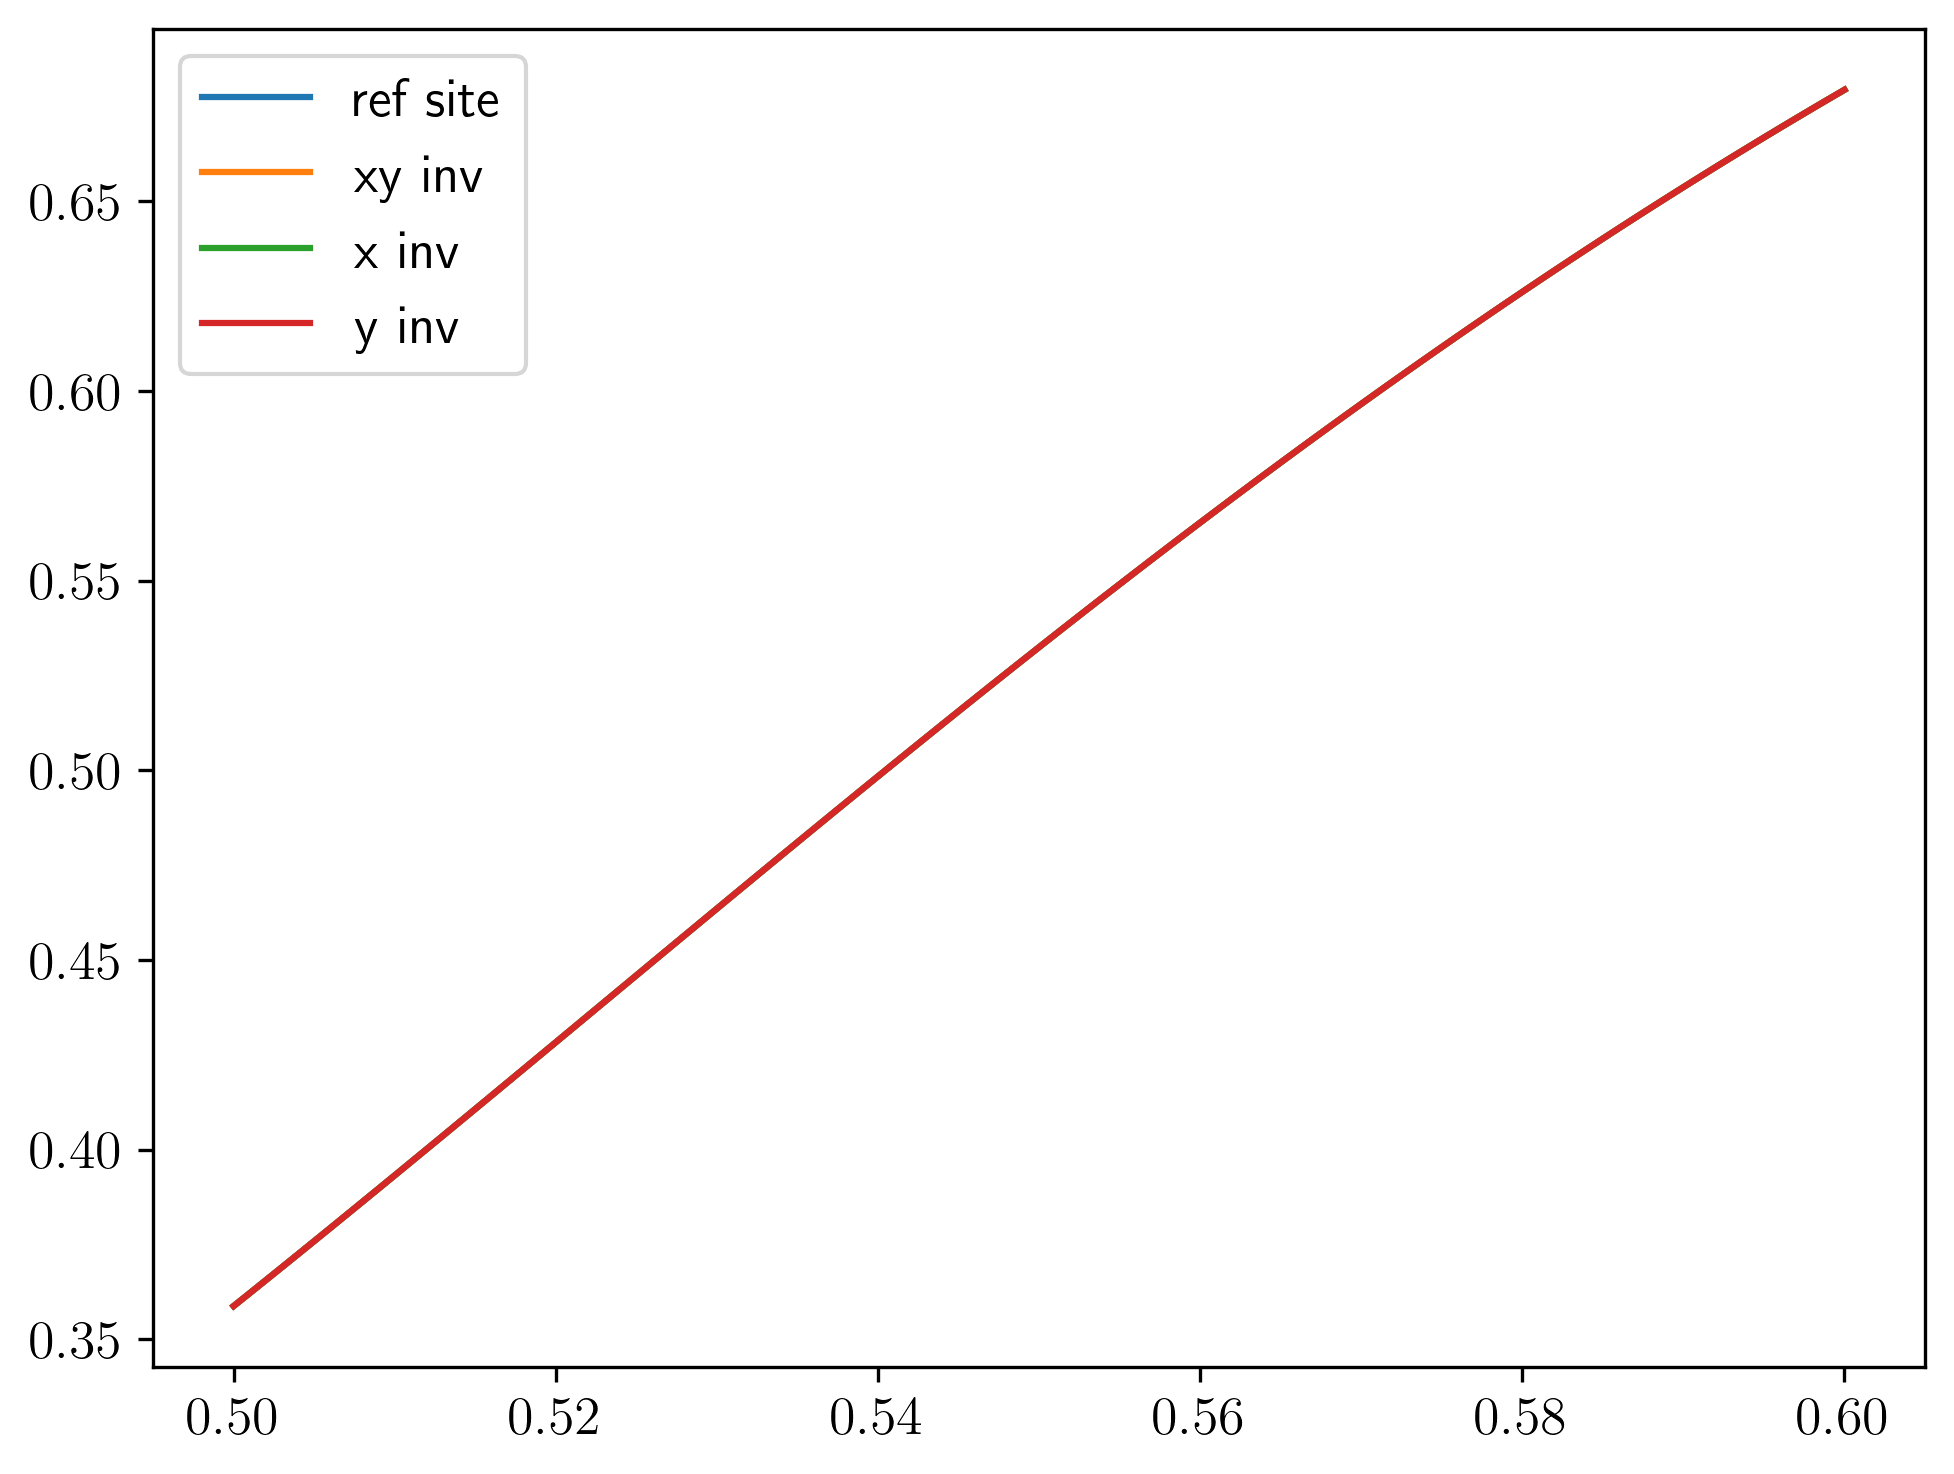

In [38]:
plot_compare_strings(ref_site, params)

## Observables with different Lattice sizes

### 1. t'Hooft String

In [7]:
def plot_thooft_string_lattices(Ls, chis, h_i, h_f, npoints, lxs, lys):
    hs = np.linspace(h_i,h_f,npoints)
    # hs = np.logspace(h_i,h_f,npoints)
    cx = None
    cy = None
    if cx == None:
        sector = "vacuum_sector"
    else:
        sector = f"{len(cx)}_particle(s)_sector"
    # parent_path="/Users/fradm98/Google Drive/My Drive/projects/1_Z2"

    colors = create_sequential_colors(len(chis))
    i = 0
    for L, chi, lx, ly in zip(Ls, chis, lxs, lys):
        l = L
        string = np.load(f"{parent_path}/results/thooft/thooft_string_first_moment_{lx}-{ly}_horizontal_Z2_dual_direct_lattice_{l}x{L}_{sector}_bc_{boundcond}_{cx}-{cy}_h_{h_i}-{h_f}_delta_{npoints}_chi_{chi}.npy")
        plt.plot(hs, string, color=colors[i], label=f"${l}$x${L}$; $\chi={chi}$")
        i += 1

    plt.title(f"t'Hooft String of $Z_2$ different lattice sizes")
    plt.legend();
    plt.savefig(f"{parent_path}/figures/thooft/thooft_string_first_moment_{lx}-{ly}_horizontal_Z2_dual_direct_lattice_{Ls}x{Ls}_{sector}_bc_{boundcond}_{cx}-{cy}_h_{h_i}-{h_f}_delta_{npoints}_chi_{chis}.png")


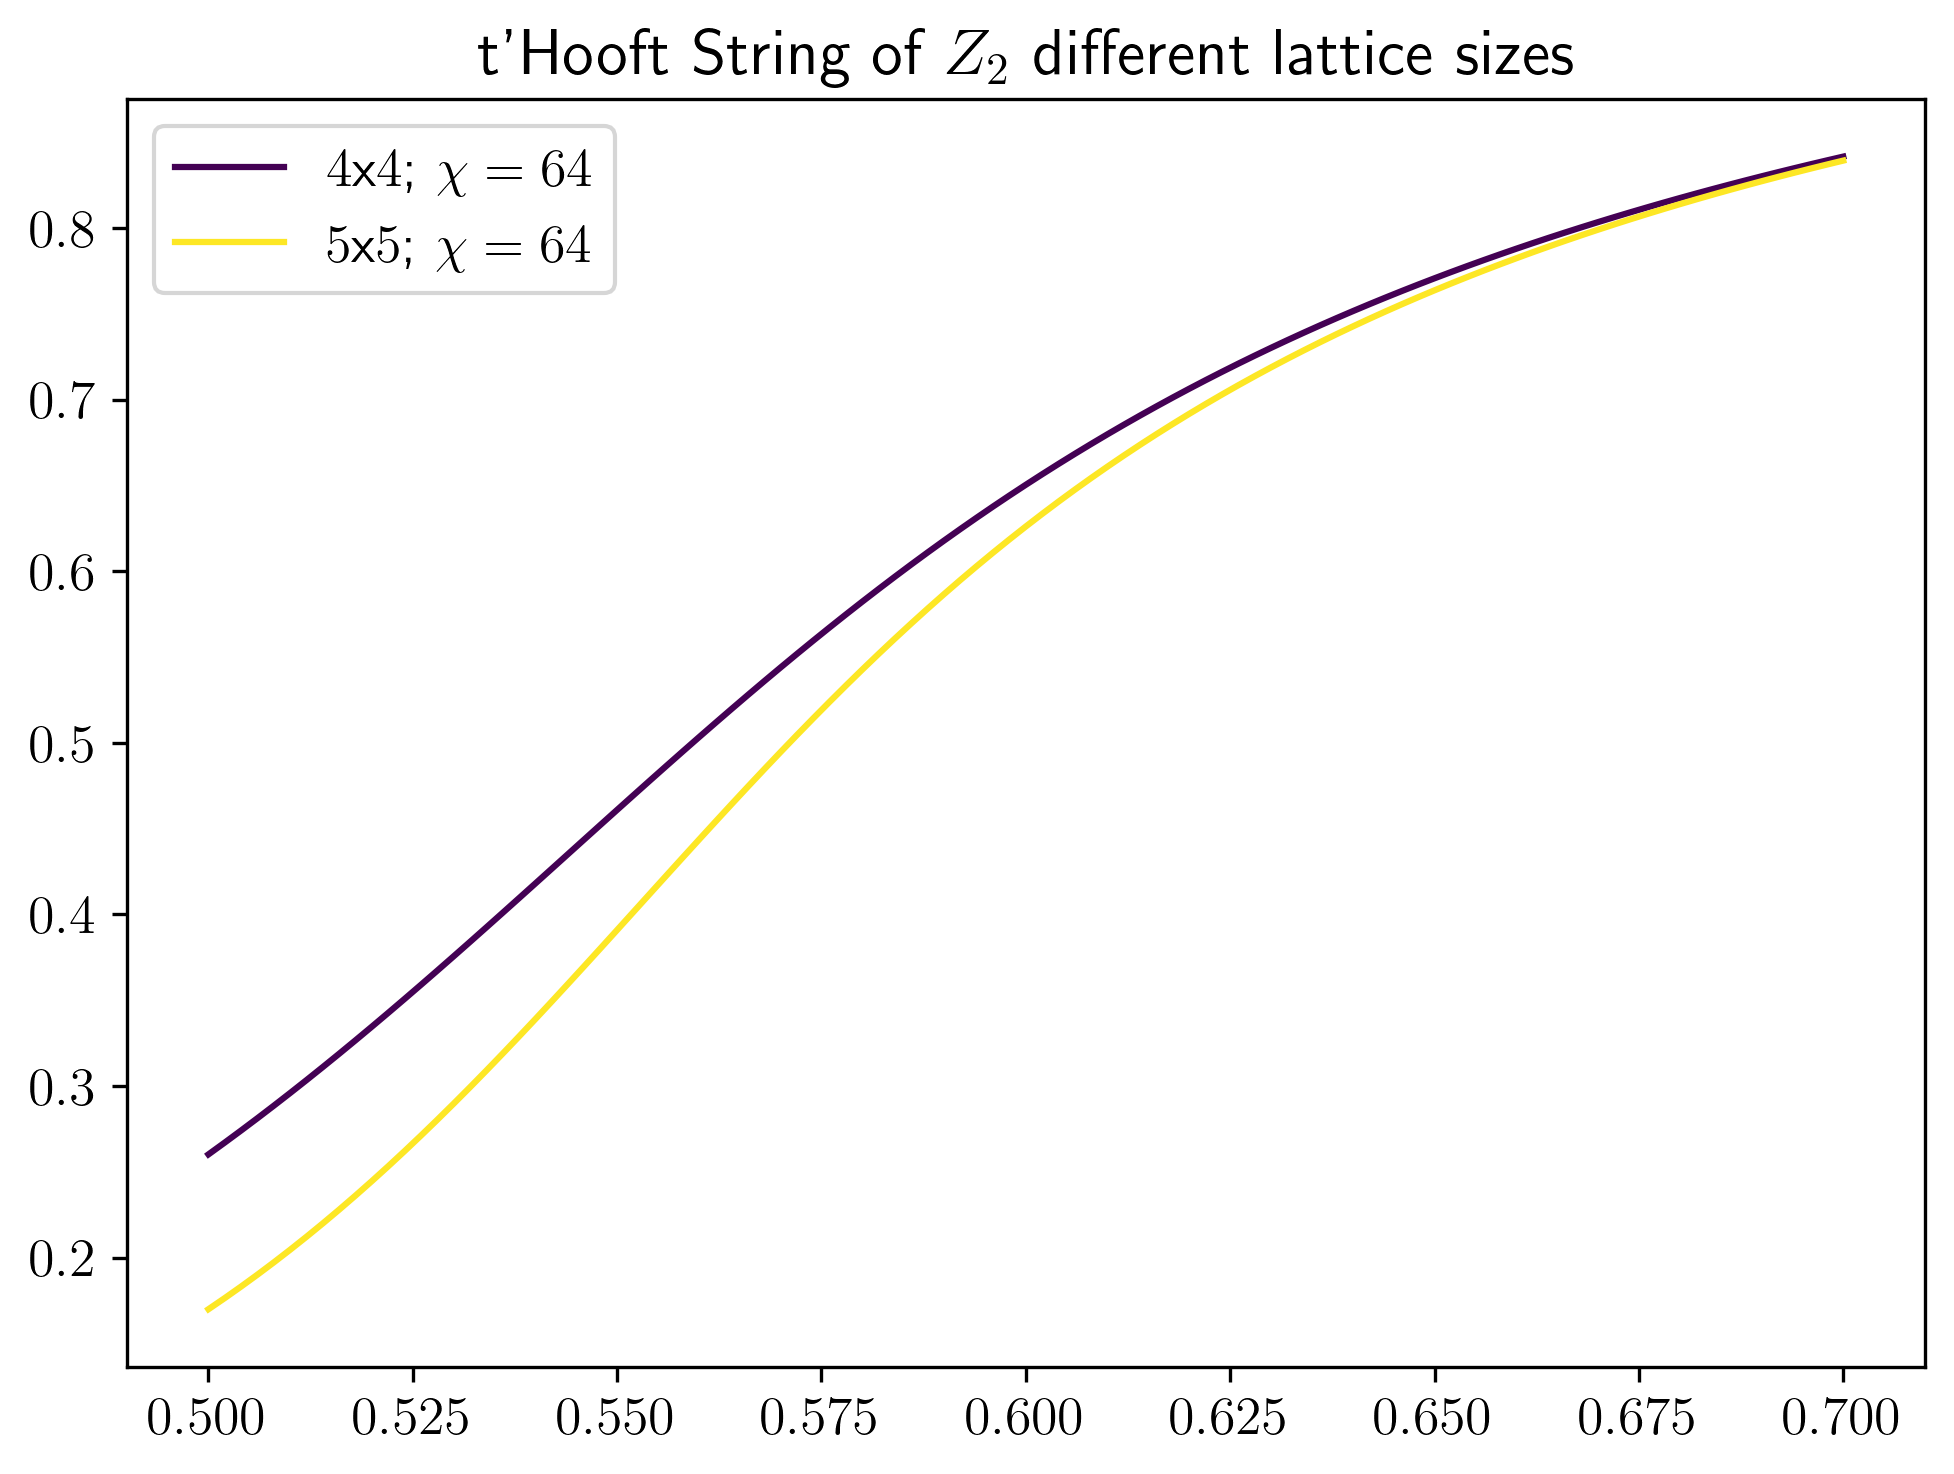

In [9]:
Ls = [4,5]
chis = [64]*len(Ls)
h_i = 0.5
h_f = 0.7
lxs = [1,2,2,3]
lys = [1,2,2,3]
npoints = 101
plot_thooft_string_lattices(Ls, chis, h_i, h_f, npoints, lxs, lys)

### Extracting $\gamma$ and $\nu$ from $g_c$ with a $Log$ law

We know that:
$$ \frac{dM}{dg}|_{h_{max}} \sim |g_c(L)-g_c(\infty)|^{-\gamma} \sim L^{\frac{\gamma}{\nu}}$$
where the derivative of the magnetization represents the susceptibility and the $\gamma, \nu$ *critical exponents* can be found with two formulas. 
1. In one formula we use the experimental value of $g_c^{exp}(\infty)=0.555$ extracted from the entropy maxima and the critical point for finite sizes $L$ to find $\nu$:
$$ |g_c(L)-g_c^{exp}(\infty)|^{-\gamma (\frac{-\nu}{-\nu})}=cL^{\frac{\gamma}{\nu}} $$
$$ \log(|g_c(L)-g_c^{exp}(\infty)|)=c + \frac{1}{\nu} \log(\frac{1}{L}) $$
2. Now we use the $\nu$ just found to get $\gamma$:
$$ \log(\frac{dM}{dg}|_{h_{max}}) = \log(cL^{\frac{\gamma}{\nu}})= \log(c)+\frac{\gamma}{\nu}\log(L)$$

In [10]:
def plot_derivative_thooft_string_lattices(Ls, chis, h_i, h_f, npoints, lxs, lys, ls=None):
    colors = create_sequential_colors(len(chis))
    i = 0
    max_vals = []
    x_vals = []
    idxs = []
    hs = np.linspace(h_i,h_f,npoints)
    cx = None
    cy = None
    if cx == None:
        sector = "vacuum_sector"
    else:
        sector = f"{len(cx)}_particle(s)_sector"

    sus = []
    for L, chi, lx, ly, l in zip(Ls, chis, lxs, lys, ls):
        if l == None:
            l = L
        string = np.load(f"{parent_path}/results/thooft/thooft_string_first_moment_{lx}-{ly}_horizontal_Z2_dual_direct_lattice_{l}x{L}_{sector}_bc_{boundcond}_{cx}-{cy}_h_{h_i}-{h_f}_delta_{npoints}_chi_{chi}.npy")
        d_string_dh = np.gradient(string, hs)
        idx_max = np.argmax(d_string_dh)
        max_vals.append(np.max(d_string_dh))
        x_vals.append(hs[idx_max])
        sus.append(d_string_dh)
        idxs.append(idx_max)
        # plt.plot(hs, string, color=colors[i], linestyle='--', label=f"${l}$x${L}$; $\chi={chi}$")
        plt.plot(hs, d_string_dh, color=colors[i], label=f"${l}$x${L}$; $\chi={chi}$")
        i += 1
    plt.scatter(x_vals, max_vals, marker='o', facecolors="white", edgecolors="red")
    plt.title(f"Derivative of t'Hooft String of $Z_2$ different lattice sizes")
    plt.ylabel("$d\langle M \\rangle / dg$")
    plt.xlabel("electric term $(g)$")
    plt.savefig(f"{parent_path}/figures/thooft/thooft_string_derivative_first_moment_{lx}-{ly}_horizontal_Z2_dual_direct_lattice_{Ls}x{Ls}_{sector}_bc_{boundcond}_{cx}-{cy}_h_{h_i}-{h_f}_delta_{npoints}_chi_{chis}.png")

    plt.legend();
    return max_vals, x_vals, sus, idxs

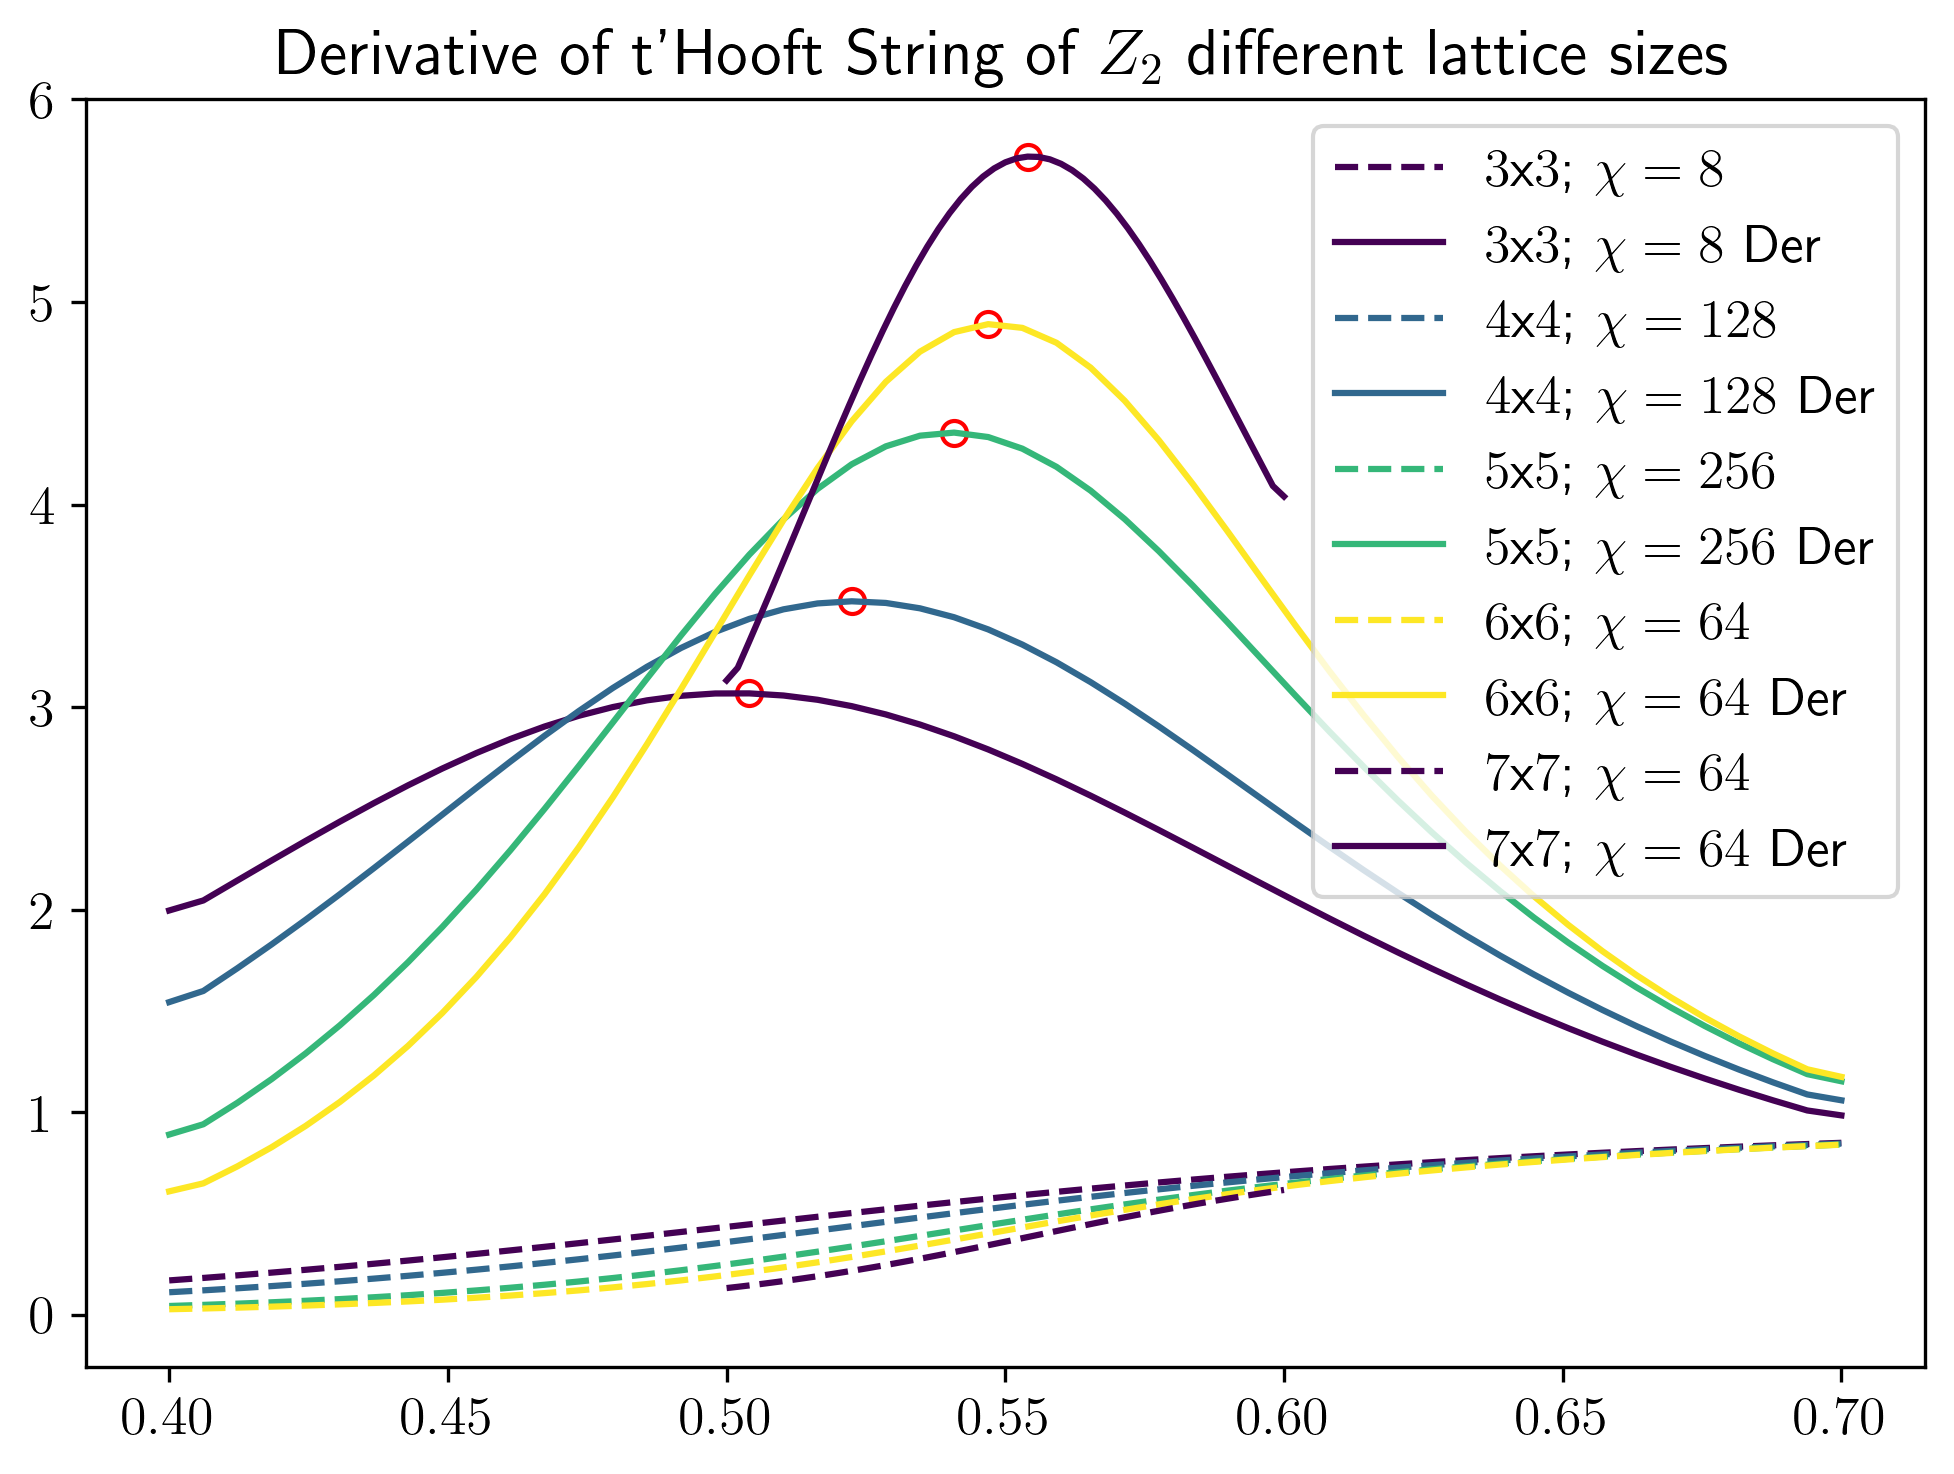

In [45]:
Ls1 = [3,4,5,6]
chis = [8,128,256,64]
h_i = 0.4
h_f = 0.7
lxs = [1,2,2,2]
lys = [1,1,2,2]
npoints = 50
max_vals_1, x_vals_1,_ = plot_derivative_thooft_string_lattices(Ls1, chis, h_i, h_f, npoints, lxs, lys)
Ls2 = [7]
chis = [64]
h_i = 0.5
h_f = 0.6
lxs = [3]
lys = [3]
npoints = 51
max_vals_2, x_vals_2,_ = plot_derivative_thooft_string_lattices(Ls2, chis, h_i, h_f, npoints, lxs, lys)

In [23]:
Ls = [10,20,30,40,50]
ls = [6]*len(Ls)
chis = [64]*len(Ls)
h_i = 0.01
h_f = 1.0
lxs = [5,10,15,20,25]
lys = [2]*len(Ls)
npoints = 101
x_err = (h_f-h_i)/npoints
print(f"{x_err:.1e}")

9.8e-03


In [13]:
Ls = [4,5,6]
ls = Ls
chis = [32,32,32]
h_i = 0.5
h_f = 0.7
lxs = [1,2,2,3]
lys = [1,2,2,3]
npoints = 101
x_err = (h_f-h_i)/npoints
print(f"{x_err:.1e}")

2.0e-03


FileNotFoundError: [Errno 2] No such file or directory: '/Users/fradm98/Google Drive/My Drive/projects/1_Z2/results/thooft/thooft_string_first_moment_2-2_horizontal_Z2_dual_direct_lattice_6x6_vacuum_sector_bc_pbc_None-None_h_0.5-0.7_delta_101_chi_32.npy'

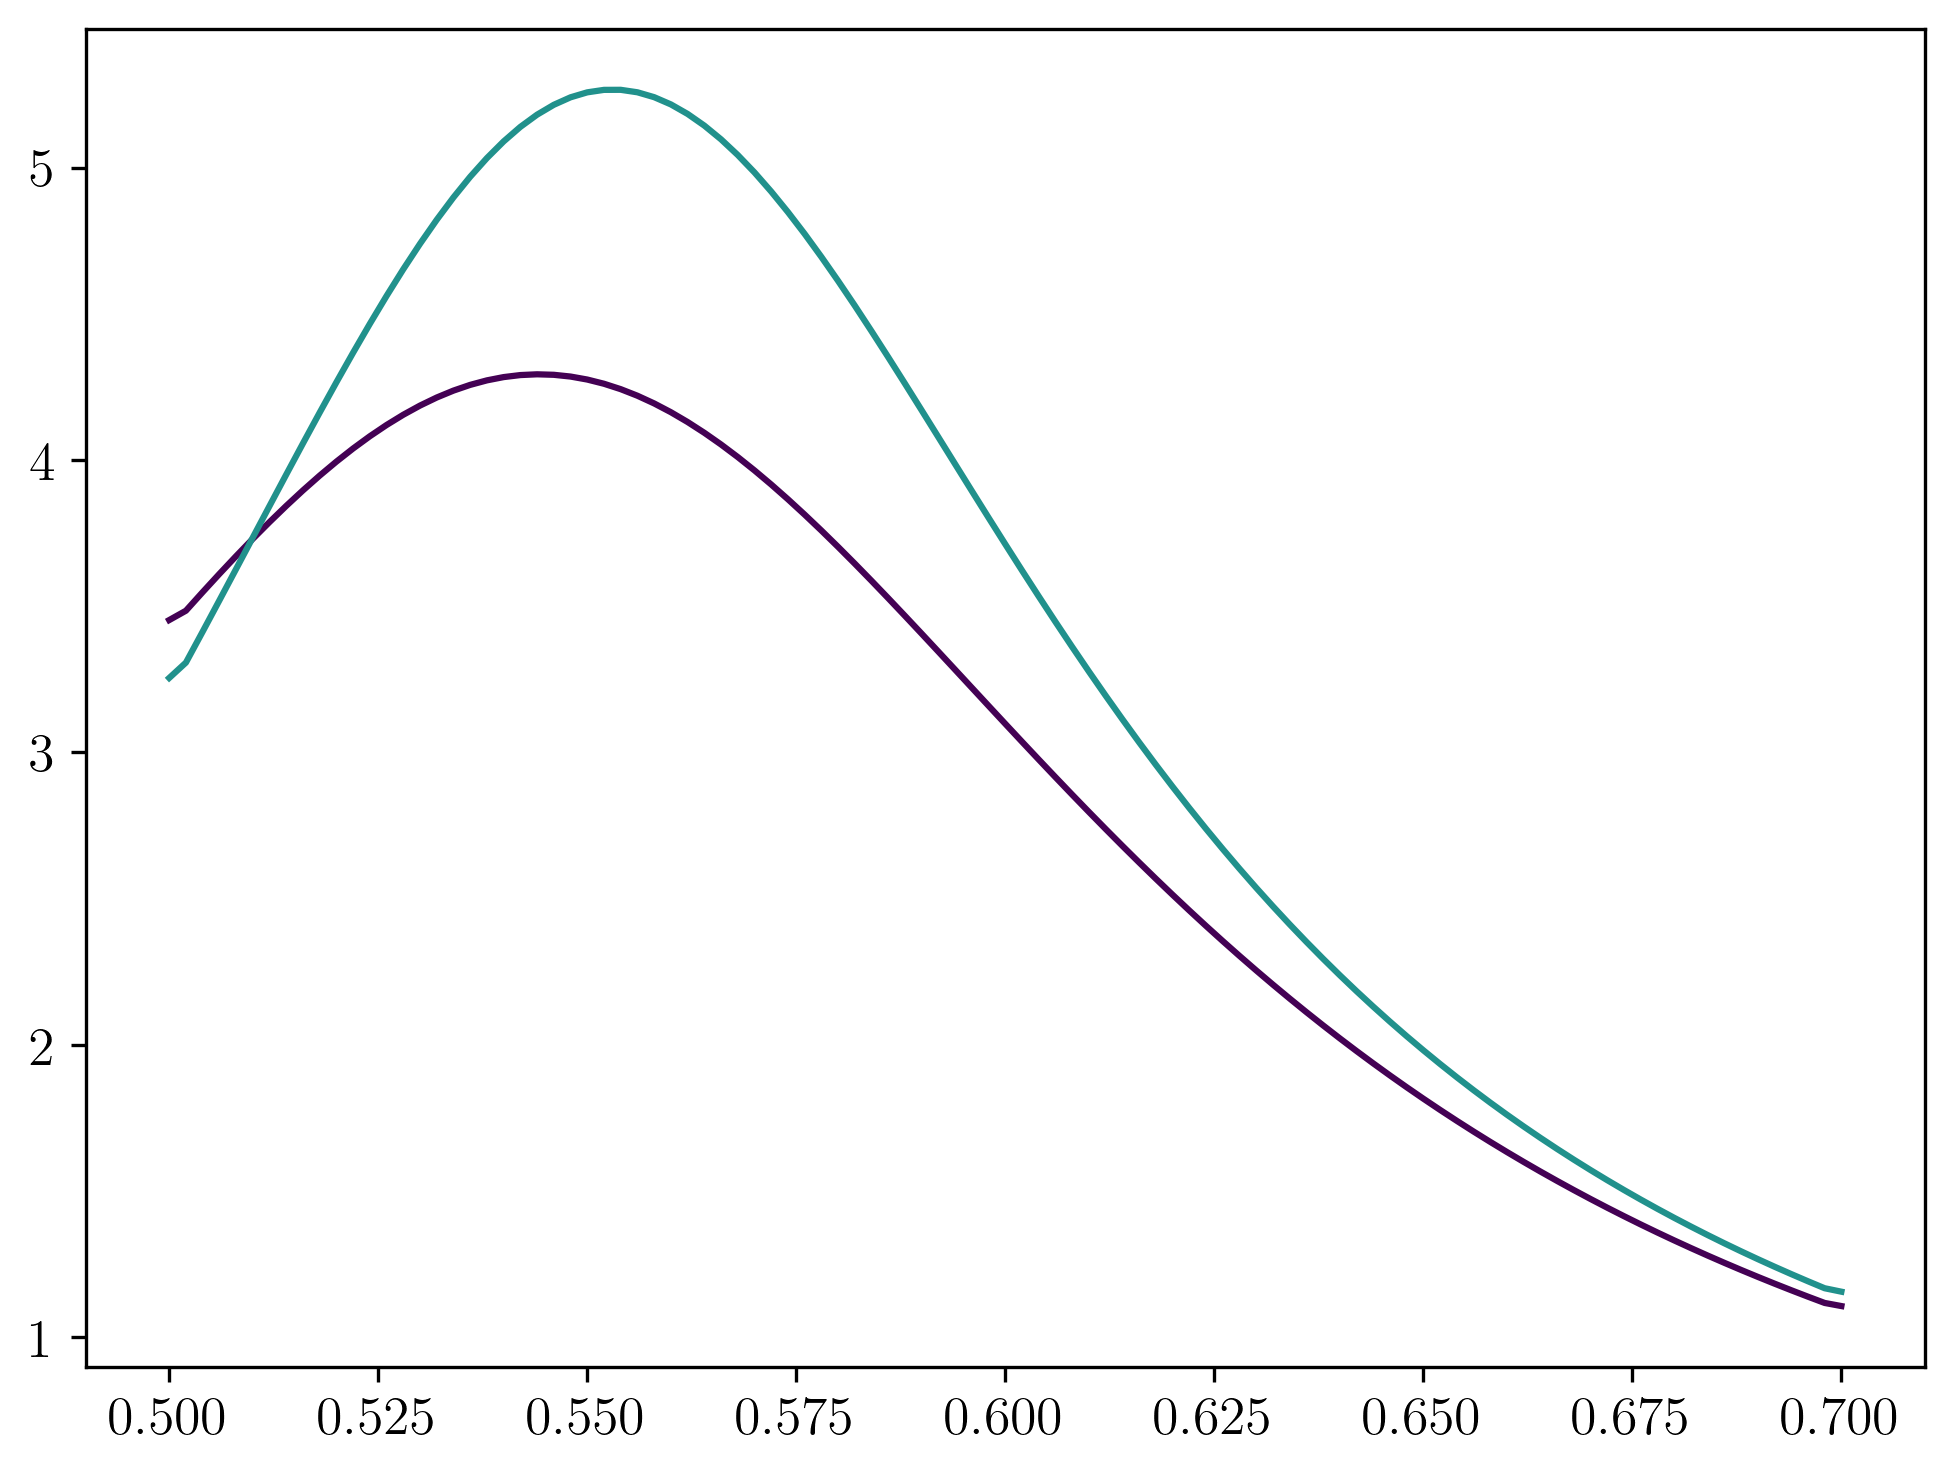

In [14]:
max_vals, x_vals, susceptibility, idx_max = plot_derivative_thooft_string_lattices(Ls, chis, h_i, h_f, npoints, lxs, lys, ls)

In [54]:
def pow_law(L,b,c,x):
    return b + c*(L**x)

In [55]:
x_vals_err = np.array([x_err]*len(x_vals))
powp, powc = curve_fit(pow_law, Ls, x_vals, sigma=x_vals_err, absolute_sigma=True, bounds=([0,-np.inf,-2],[1,np.inf,np.inf]))
perr = np.sqrt(np.diag(powc))
print(f"Critical g: {powp[0]} +/- {perr[0]}")
print(f"nu: {-1/powp[2]} +/- {(1/(powp[2]-perr[2]) - 1/(powp[2]+perr[2]))/2}")

print("Parameter uncertainties:", perr)

Critical g: 0.5732671703633965 +/- 0.009751349473835555
nu: 0.5651812206915288 +/- 0.1907826327148418
Parameter uncertainties: [0.00975135 0.33056159 0.54134936]


In [82]:
g_th = 1/np.sqrt(3.044)
g_th

0.5731623781225857

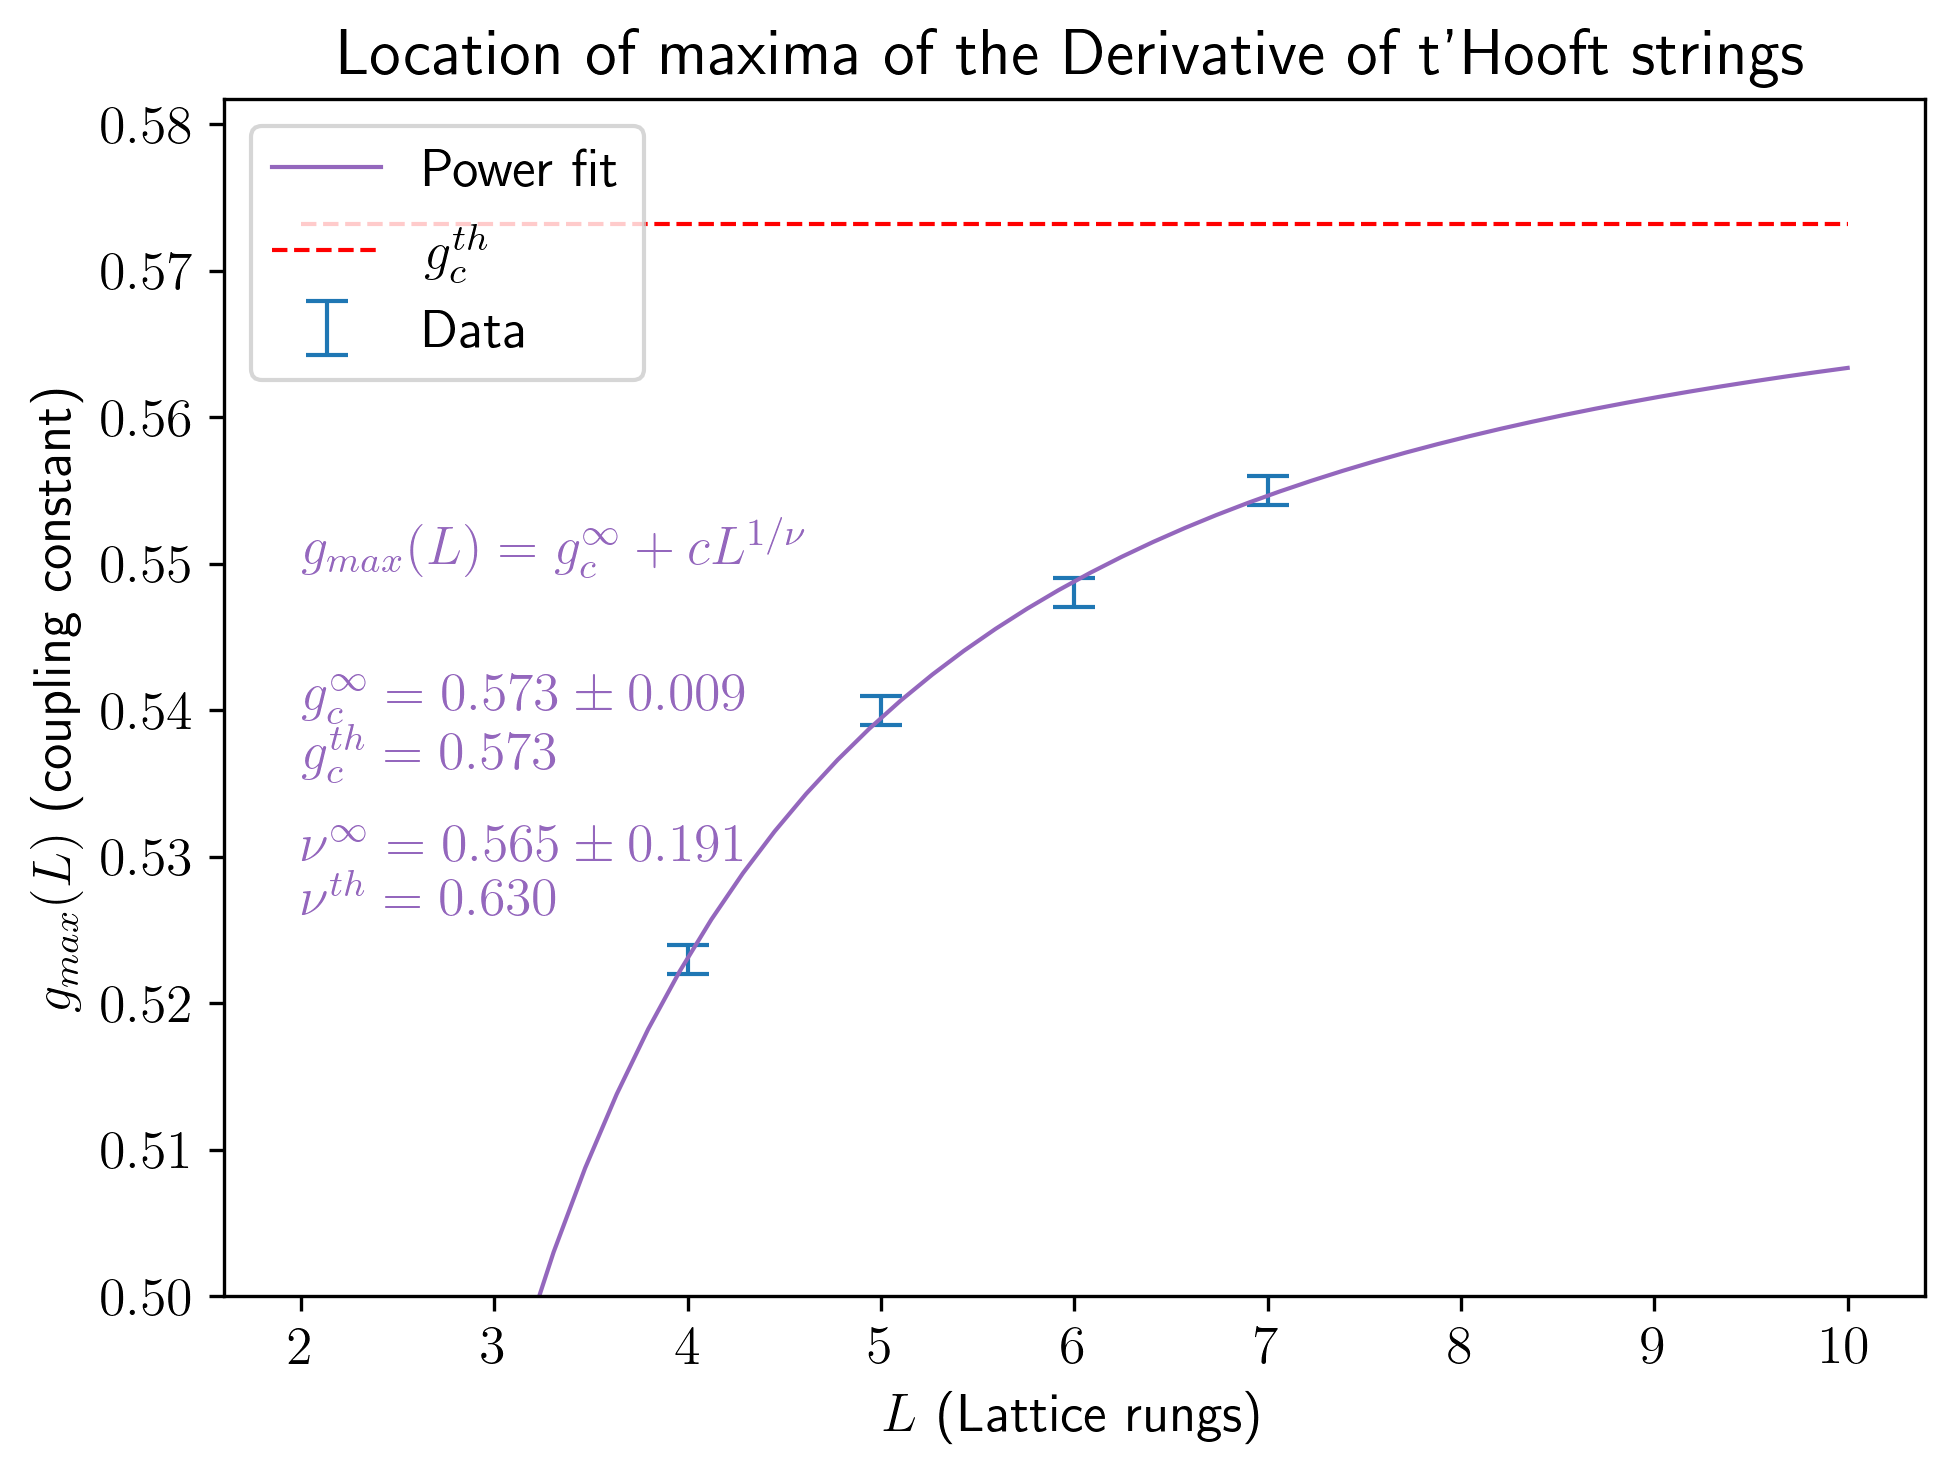

In [107]:
plt.errorbar(Ls, x_vals, yerr=x_err, elinewidth=1, capsize=5, barsabove=True, linewidth=0, color='C0', label="Data")
x = np.linspace(2,10)
plt.plot(x, pow_law(x,powp[0],powp[1],powp[2]), linewidth=1, color='C4', label="Power fit")
plt.hlines(y=g_th, xmin=2, xmax=10, linestyles='--', linewidth=1, colors='red', label="$g_c^{th}$")

plt.text(x=2, y=0.55, s="$g_{max}(L)=g_c^{\\infty} + cL^{1/\\nu}$", color='C4')
plt.text(x=2, y=0.54, s="$g_c^{\\infty} = 0.573 \\pm 0.009$", color='C4')
plt.text(x=2, y=0.536, s="$g_c^{th} = 0.573$", color='C4')
plt.text(x=2, y=0.53, s="$\\nu^{\\infty} = 0.565 \\pm 0.191$", color='C4')
plt.text(x=2, y=0.526, s="$\\nu^{th} = 0.630$", color='C4')
plt.title("Location of maxima of the Derivative of t'Hooft strings")
plt.xlabel("$L$ (Lattice rungs)")
plt.ylabel("$g_{max}(L)$ (coupling constant)")
plt.ylim(0.5)
plt.legend()

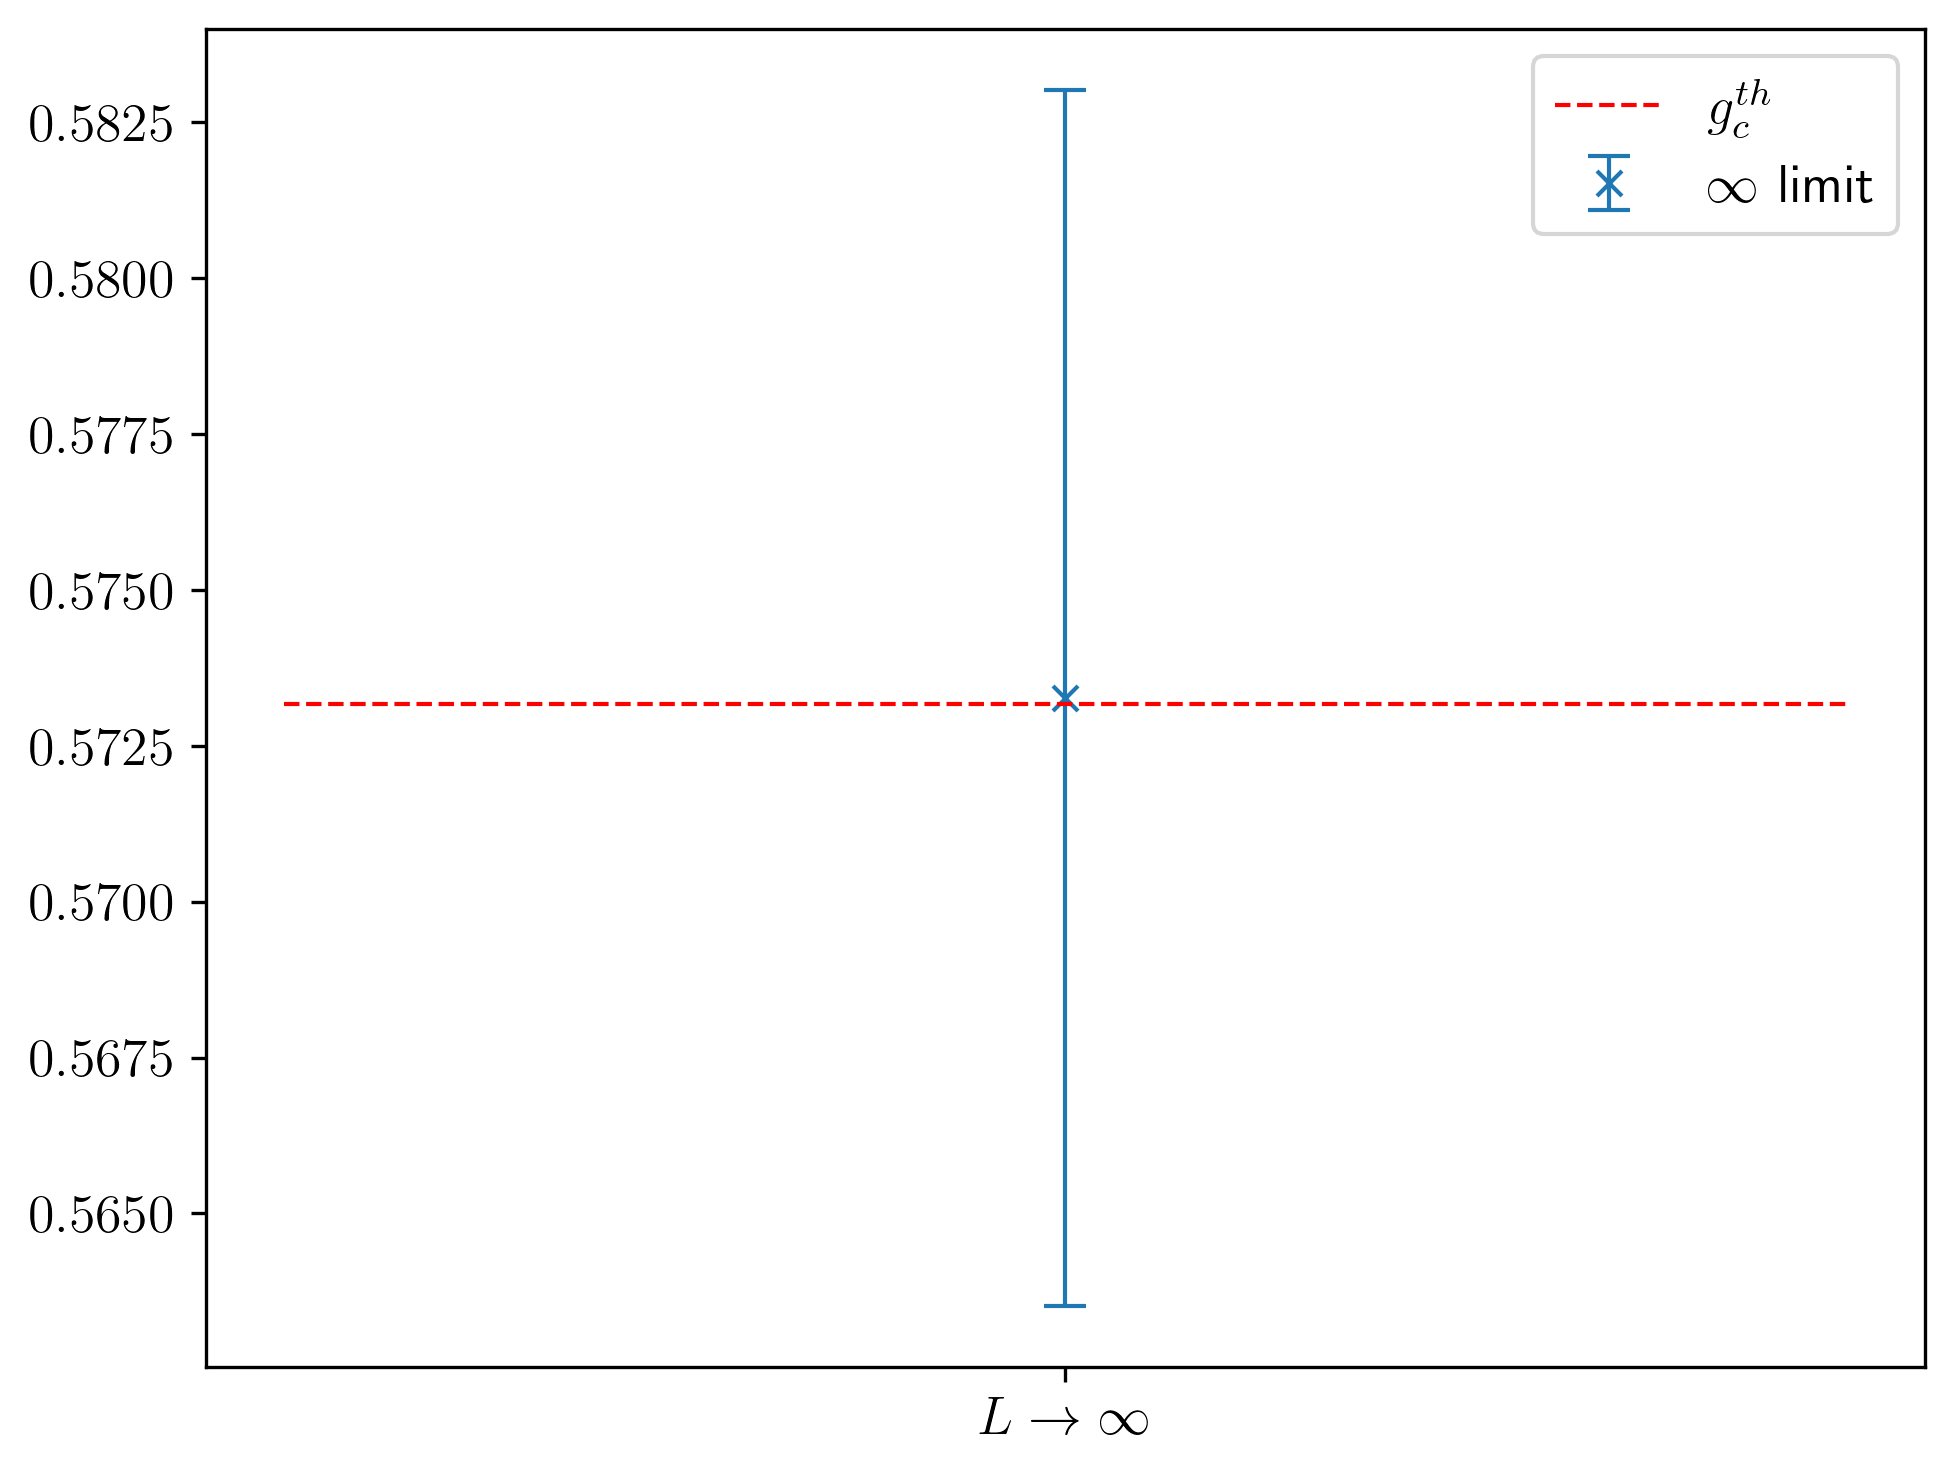

In [96]:
plt.errorbar(x=1e+5, y=pow_law(np.inf,powp[0],powp[1],powp[2]), yerr=perr[0], elinewidth=1, capsize=5, barsabove=True, linewidth=0, color='C0', marker='x', label="$\\infty$ limit")
plt.hlines(y=g_th, xmin=1e+5 - 0.1, xmax=1e+5 + 0.1, linestyles='--', linewidth=1, colors='red', label="$g_c^{th}$")

plt.xticks(ticks=[1e+5], labels=["$L \\rightarrow \\infty$"])
plt.legend()

In [57]:
nu_plus = -1/(powp[2]+perr[2])
nu_minus = -1/(powp[2]-perr[2])
nu_mean = -1/powp[2]
print(nu_plus, nu_minus)
p_frac, c_frac = curve_fit(pow_law, Ls, max_vals, bounds=([0,-np.inf,0],[1,np.inf,3]))
perr_frac = np.sqrt(np.diag(c_frac))
print(f"gamma/nu: {p_frac[2]} +/- {perr_frac[2]}")
print(f"gamma/nu plus: {p_frac[2]+perr_frac[2]}")
print(f"gamma plus: {(p_frac[2]+perr_frac[2])*nu_plus}")
print(f"gamma minus: {(p_frac[2]-perr_frac[2])*nu_minus}")

0.8143358011240949 0.43277053569441126
gamma/nu: 0.8846446818103699 +/- 0.9723309612045483
gamma/nu plus: 1.8569756430149182
gamma plus: 1.5122017479224847
gamma minus: -0.0379480381064684


### Data collapse

In [78]:
def plot_data_collapse_thooft_string_lattices(Ls, chis, h_i, h_f, npoints, lxs, lys):
    colors = create_sequential_colors(len(chis))
    i = 0
    hs = np.linspace(h_i,h_f,npoints)
    h_c = 0.5732671703633965
    nu = 0.5651812206915288
    gamma_nu = 0.8846446818103699
    gamma = gamma_nu * nu
    h_red = (hs - h_c)/h_c

    cx = None
    cy = None
    if cx == None:
        sector = "vacuum_sector"
    else:
        sector = f"{len(cx)}_particle(s)_sector"
    parent_path="/Users/fradm98/Google Drive/My Drive/projects/1_Z2"

    for L, chi, lx, ly in zip(Ls, chis, lxs, lys):
        l = L
        string = np.load(f"{parent_path}/results/thooft/thooft_string_first_moment_{lx}-{ly}_horizontal_Z2_dual_direct_lattice_{l}x{L}_{sector}_bc_{boundcond}_{cx}-{cy}_h_{h_i}-{h_f}_delta_{npoints}_chi_{chi}.npy")
        plt.plot(h_red*(L**(1/nu)), string*(L**(-gamma/nu)), color=colors[i], linestyle='--', label=f"${l}$x${L}$; $\chi={chi}$")
        i += 1

    plt.title(f"Data collapse of t'Hooft String of $Z_2$ different lattice sizes")
    plt.xlabel("$\\frac{(g-g_c)}{g_c}L^{\\frac{1}{\\nu}}$")
    plt.ylabel("$fL^{-\\frac{\gamma}{\\nu}}$")
    plt.savefig(f"{parent_path}/figures/thooft/data_collapse_thooft_string_first_moment_{lx}-{ly}_horizontal_Z2_dual_direct_lattice_{Ls}x{Ls}_{sector}_bc_{boundcond}_{cx}-{cy}_h_{h_i}-{h_f}_delta_{npoints}_chi_{chis}.png")

    plt.legend();

def plot_data_collapse_der_thooft_string_lattices(Ls, chis, h_i, h_f, npoints, lxs, lys):
    colors = create_sequential_colors(len(chis))
    i = 0
    max_vals = []
    x_vals = []
    idxs = []
    hs = np.linspace(h_i,h_f,npoints)
    h_c = 0.5732671703633965
    nu = 0.5651812206915288
    gamma_nu = 0.8846446818103699
    gamma = gamma_nu * nu
    h_red = (hs - h_c)/h_c
    # nu = 0.629971
    # # gamma = 1.237075
    # gamma = 0.326419
    cx = None
    cy = None
    if cx == None:
        sector = "vacuum_sector"
    else:
        sector = f"{len(cx)}_particle(s)_sector"
    parent_path="/Users/fradm98/Google Drive/My Drive/projects/1_Z2"

    sus = []
    for L, chi, lx, ly in zip(Ls, chis, lxs, lys):
        l = L
        string = np.load(f"{parent_path}/results/thooft/thooft_string_first_moment_{lx}-{ly}_horizontal_Z2_dual_direct_lattice_{l}x{L}_{sector}_bc_{boundcond}_{cx}-{cy}_h_{h_i}-{h_f}_delta_{npoints}_chi_{chi}.npy")
        d_string_dh = np.gradient(string, hs)
        plt.plot(h_red*(L**(1/nu)), d_string_dh*(L**(-gamma/nu)), color=colors[i], label=f"${l}$x${L}$; $\chi={chi}$")
        i += 1

    plt.title(f"Data Collapse of the derivative of t'Hooft String of $Z_2$ different lattice sizes")
    plt.xlabel("$\\frac{(g-g_c)}{g_c}L^{\\frac{1}{\\nu}}$")
    plt.ylabel("$fL^{-\\frac{\gamma}{\\nu}}$")
    plt.savefig(f"{parent_path}/figures/thooft/data_collapse_thooft_string_derivative_first_moment_{lx}-{ly}_horizontal_Z2_dual_direct_lattice_{Ls}x{Ls}_{sector}_bc_{boundcond}_{cx}-{cy}_h_{h_i}-{h_f}_delta_{npoints}_chi_{chis}.png")

    plt.legend();

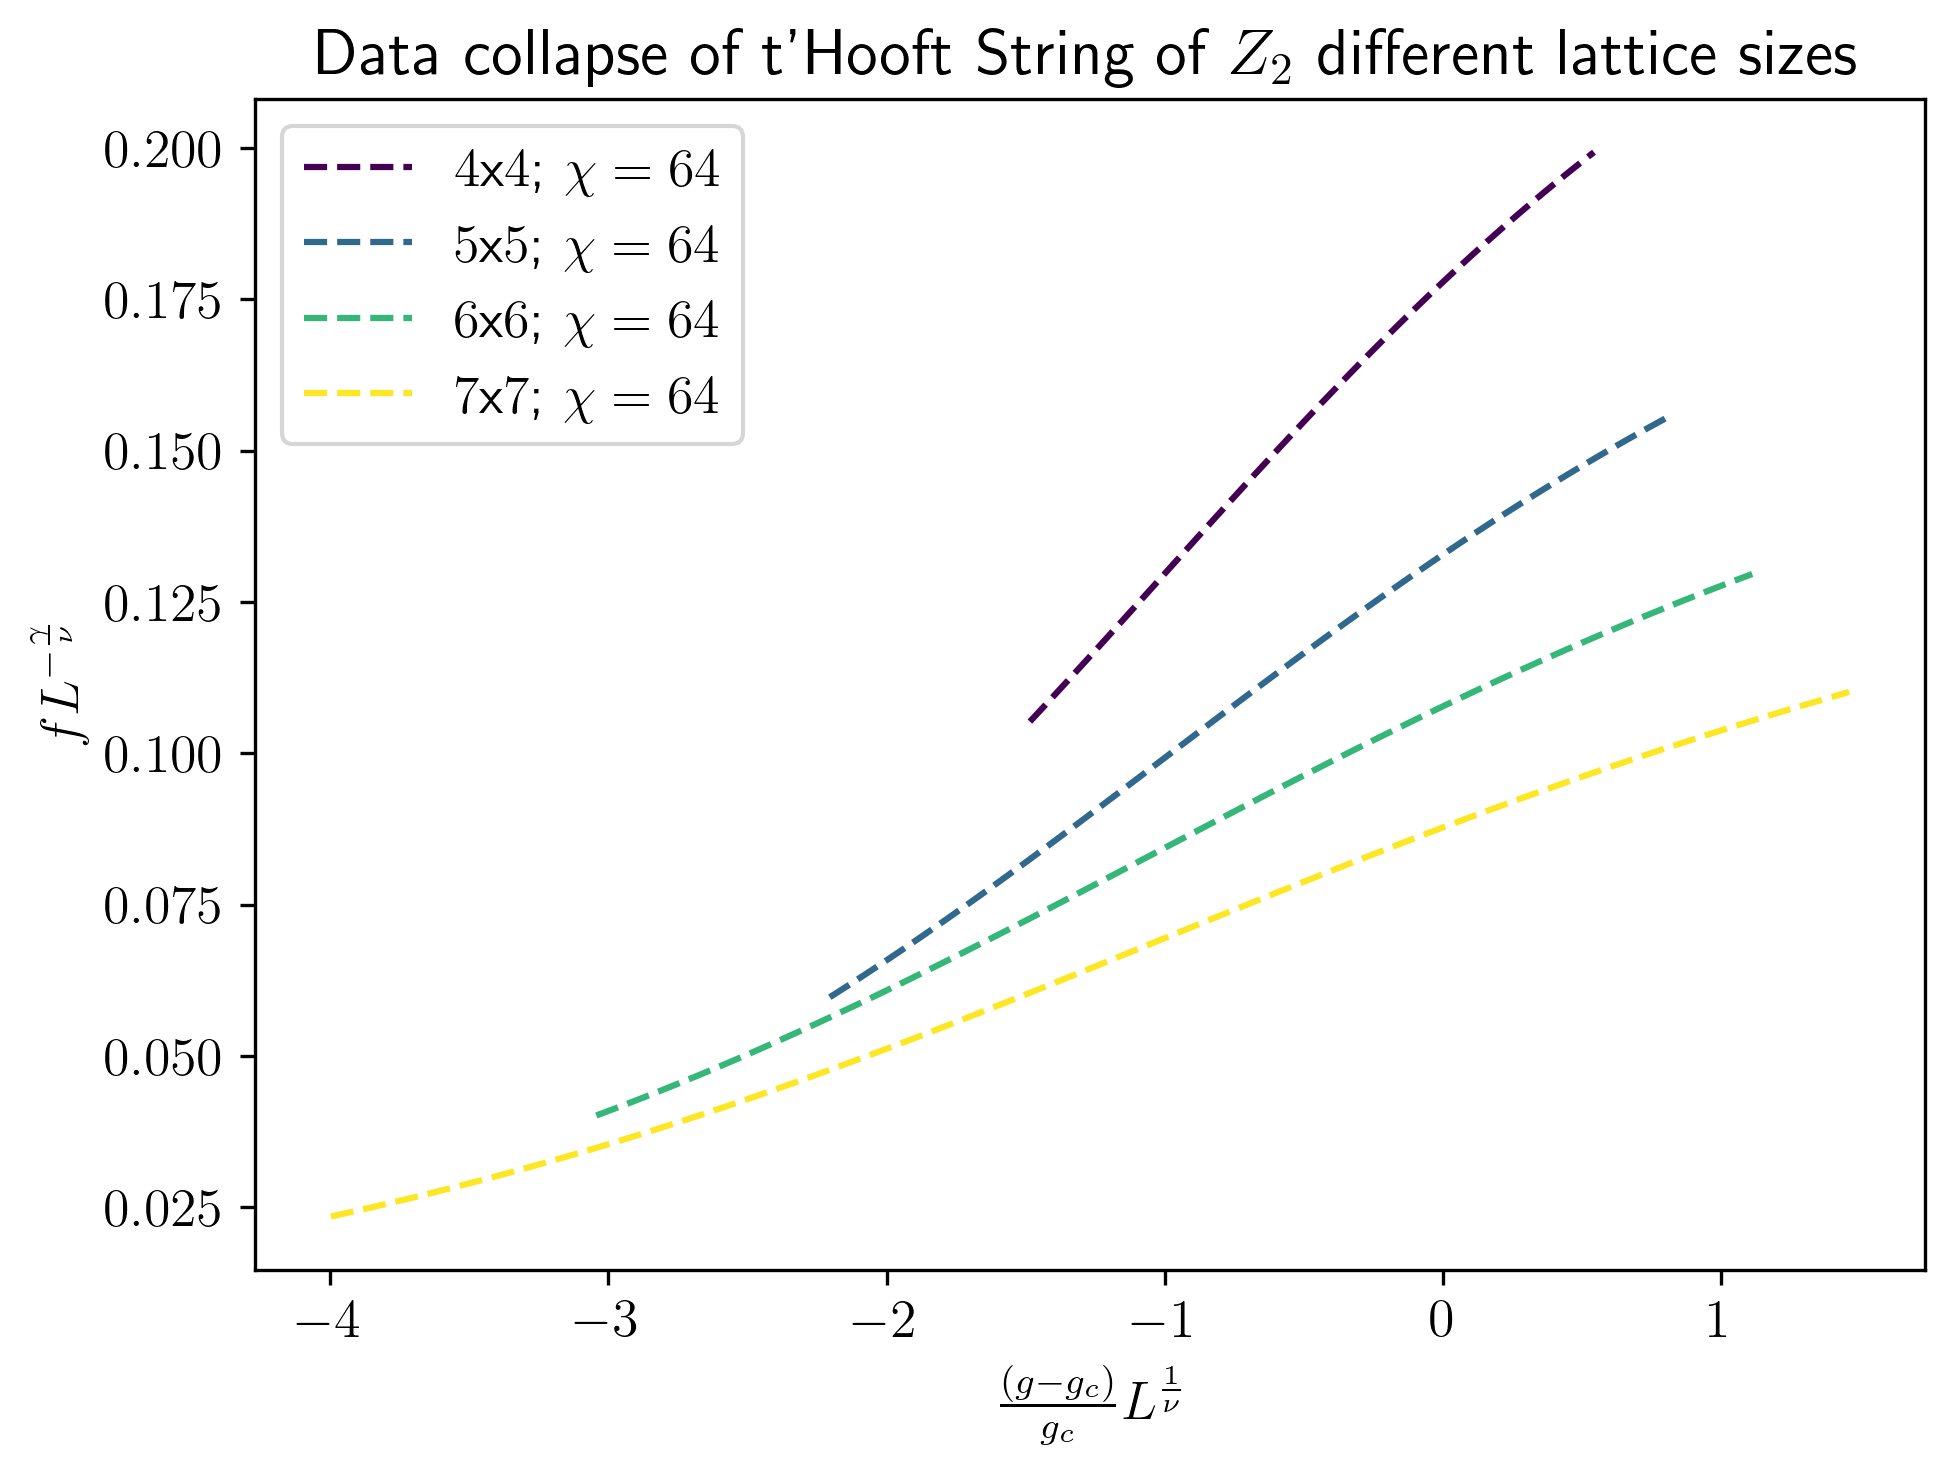

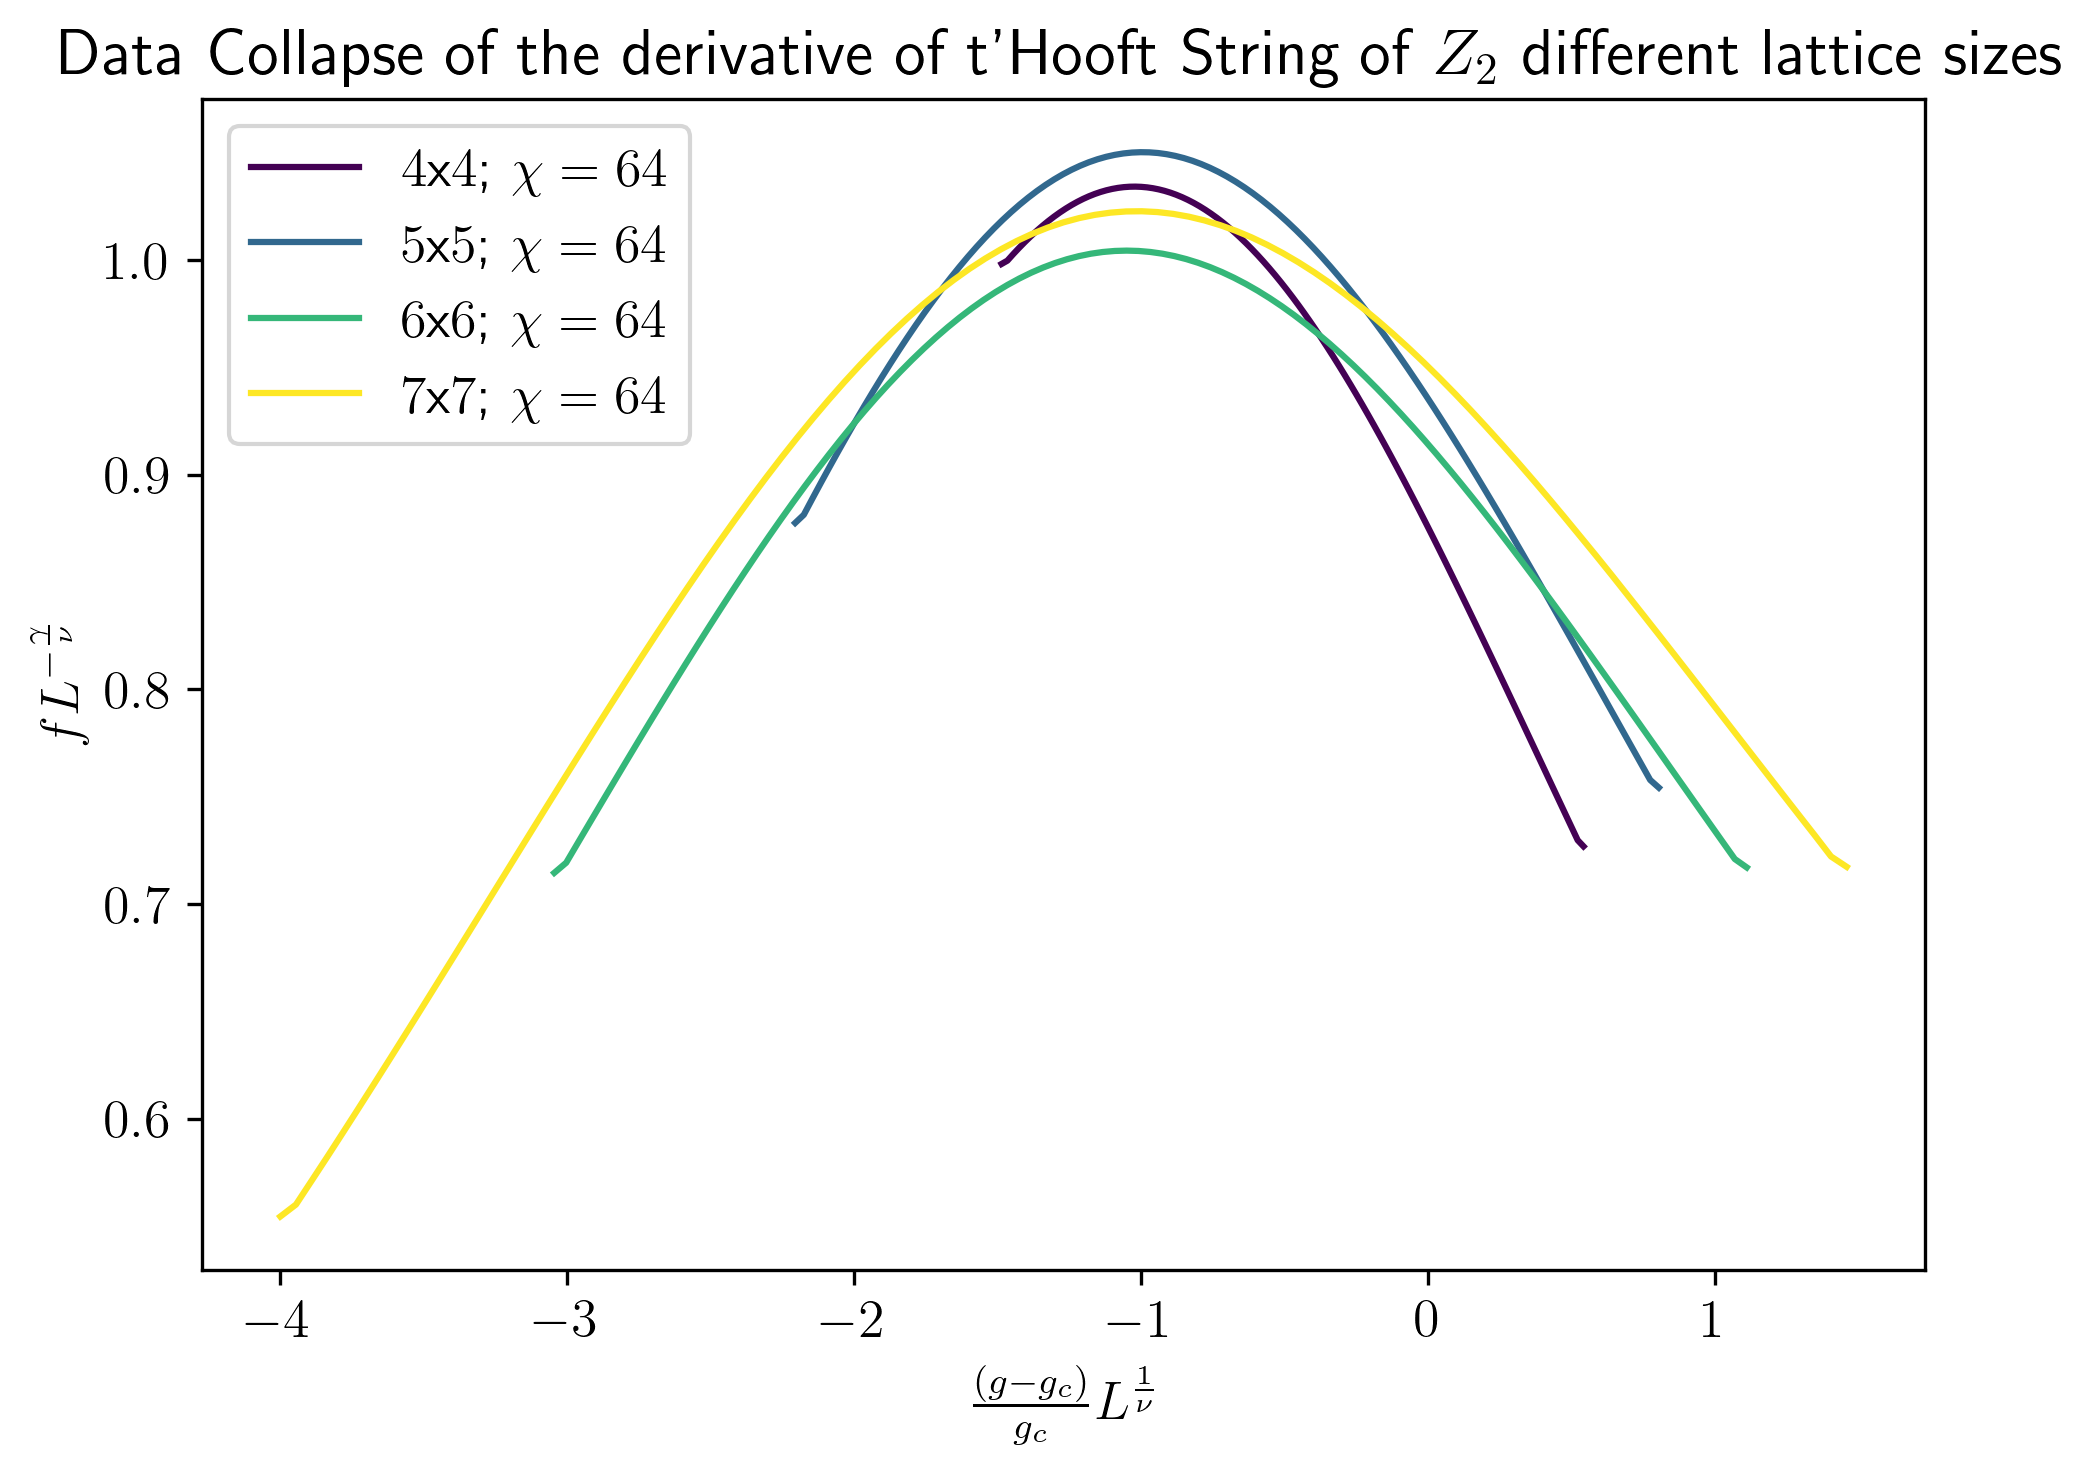

In [79]:
plot_data_collapse_thooft_string_lattices(Ls, chis, h_i, h_f, npoints, lxs, lys)
plt.show()
plot_data_collapse_der_thooft_string_lattices(Ls, chis, h_i, h_f, npoints, lxs, lys)

# Critical point methods

### 1. Binder's Cumulant

In [39]:
def load_moments():
    def moments_fn(**kwparams):
        sm = np.load(f"{parent_path}/results/mag_data/dual_mag_second_moment_Z2_dual_direct_lattice_{l}x{L}_{sector}_bc_{boundcond}_{cx}-{cy}_h_{h_i}-{h_f}_delta_{npoints}_chi_{chi}.npy")
        fm = np.load(f"{parent_path}/results/mag_data/dual_mag_fourth_moment_Z2_dual_direct_lattice_{l}x{L}_{sector}_bc_{boundcond}_{cx}-{cy}_h_{h_i}-{h_f}_delta_{npoints}_chi_{chi}.npy")
        return sm, fm
    return moments_fn

def plot_binders_cumulant():
    pass

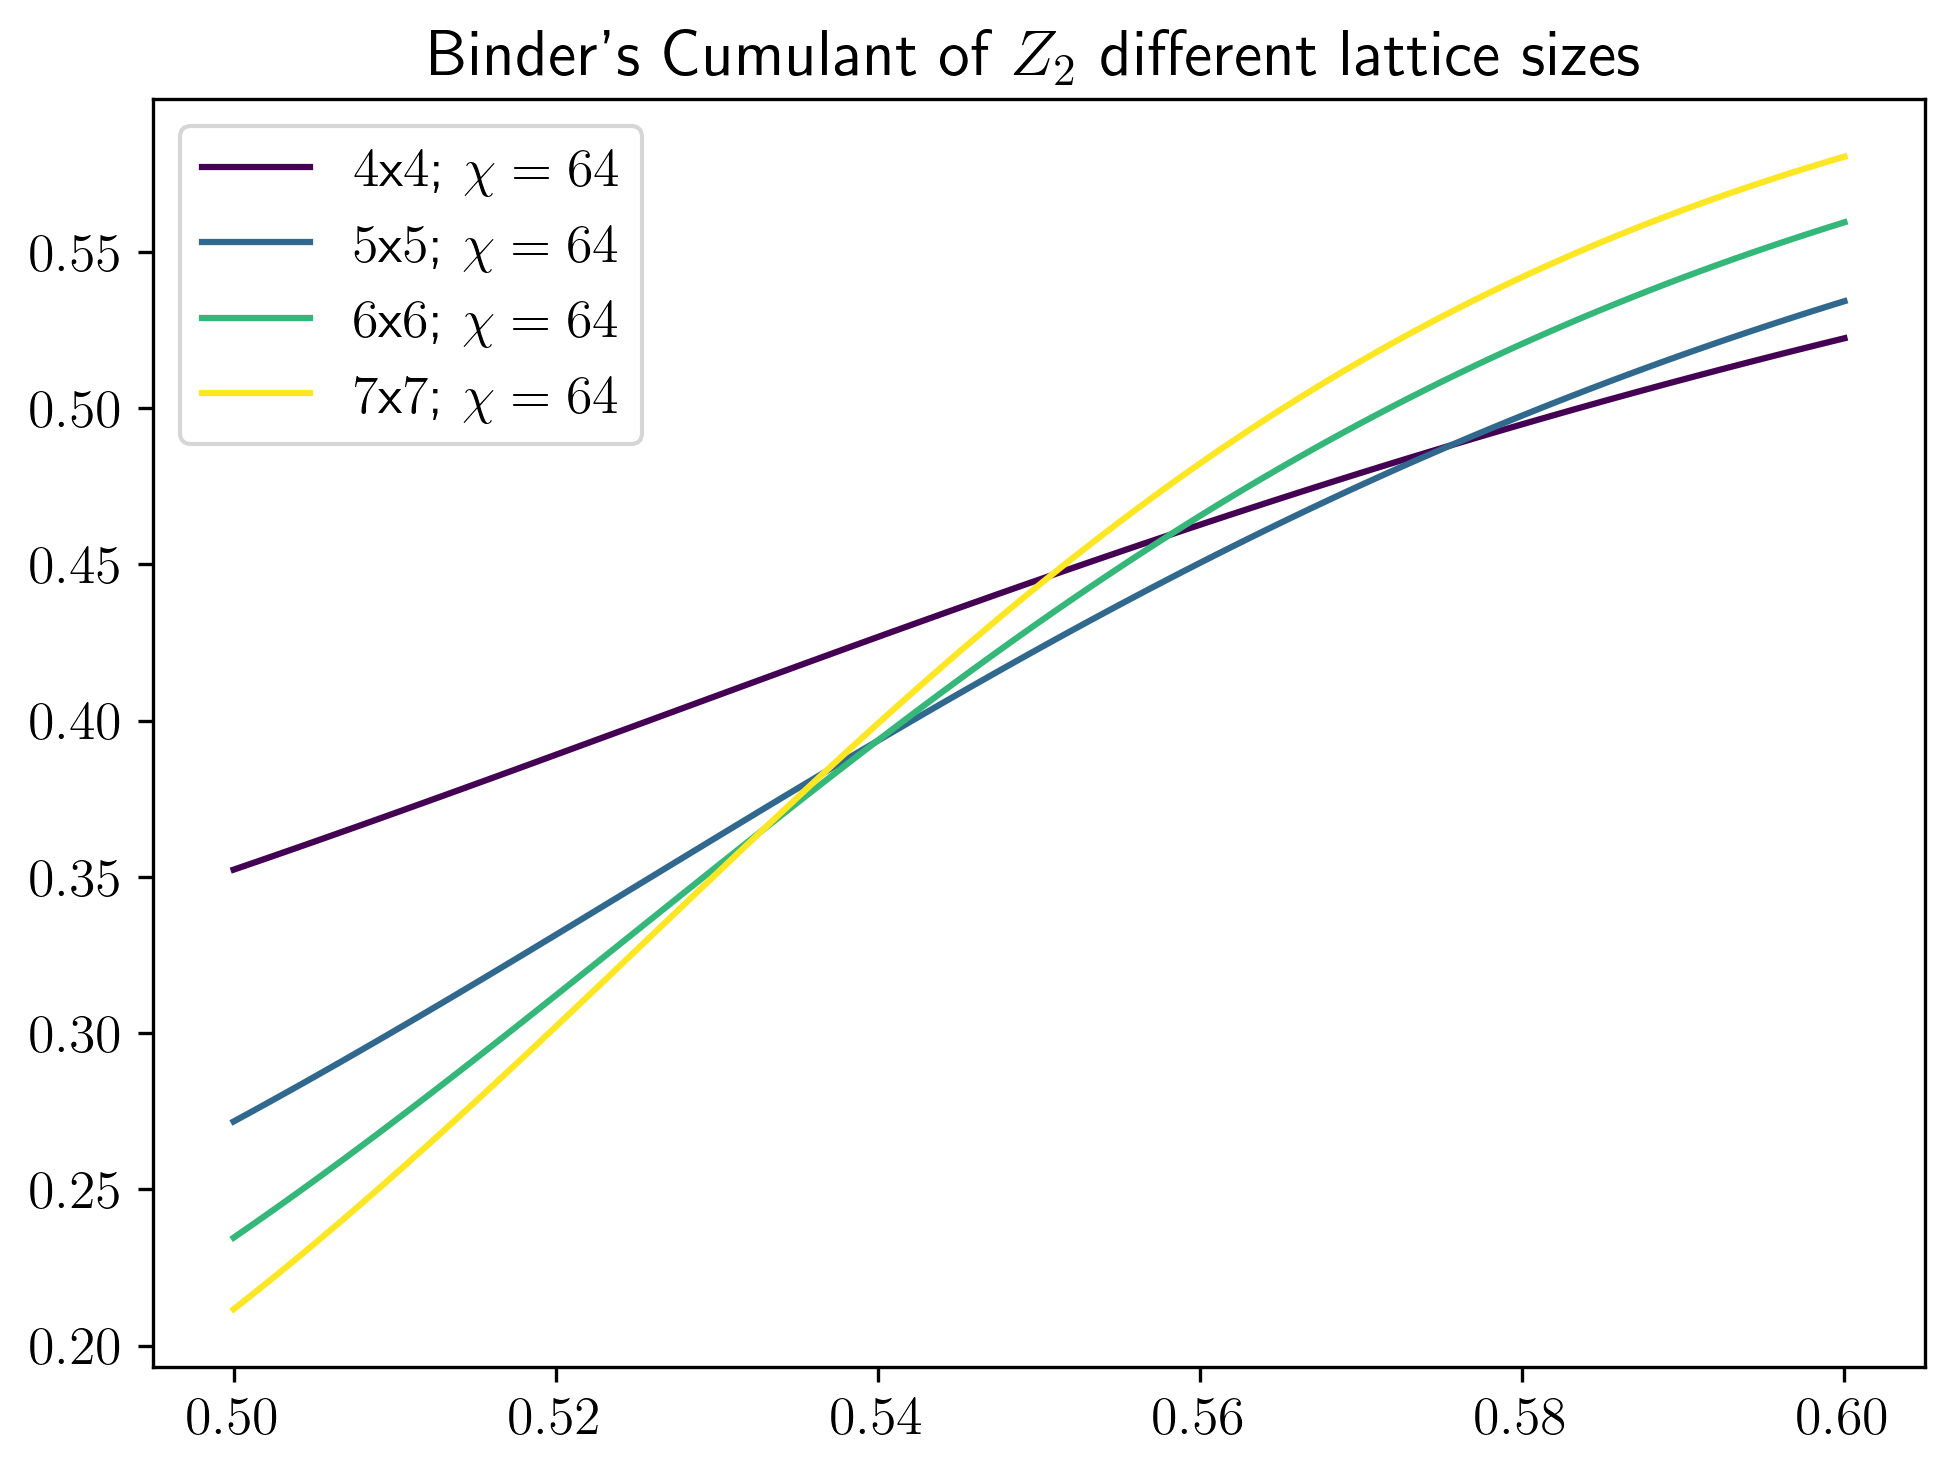

In [60]:
Ls = [4,5,6,7]
chis = [64,64,64,64]
h_i = 0.5
h_f = 0.6
npoints = 101
hs = np.linspace(h_i,h_f,npoints)
# hs = np.logspace(h_i,h_f,npoints)
cx = None
cy = None
if cx == None:
    sector = "vacuum_sector"
else:
    sector = f"{len(cx)}_particle(s)_sector"
parent_path="/Users/fradm98/Google Drive/My Drive/projects/1_Z2"

colors = create_sequential_colors(len(chis))
i = 0
bcs = []
for L, chi in zip(Ls, chis):
    l = L
    sm = np.load(f"{parent_path}/results/mag_data/dual_mag_second_moment_Z2_dual_direct_lattice_{l}x{L}_{sector}_bc_{boundcond}_{cx}-{cy}_h_{h_i}-{h_f}_delta_{npoints}_chi_{chi}.npy")
    fm = np.load(f"{parent_path}/results/mag_data/dual_mag_fourth_moment_Z2_dual_direct_lattice_{l}x{L}_{sector}_bc_{boundcond}_{cx}-{cy}_h_{h_i}-{h_f}_delta_{npoints}_chi_{chi}.npy")
    bc = binders_cumul(fourth_m=fm, sm=sm)
    plt.plot(hs, bc, color=colors[i], label=f"${l}$x${L}$; $\chi={chi}$")
    i += 1
    bcs.append(bc)

plt.title(f"Binder's Cumulant of $Z_2$ different lattice sizes")
plt.legend();
plt.savefig(f"{parent_path}/figures/critical_exponents/binders_cumulant_Z2_dual_direct_lattice_{Ls}x{Ls}_{sector}_bc_{boundcond}_{cx}-{cy}_h_{h_i}-{h_f}_delta_{npoints}_chi_{chis}.png")


### 3. Wilson Loop

In [90]:
def plot_wilson_loop(Ls, chis, h_i, h_f, npoints, loops_sites):
    hs = np.linspace(h_i,h_f,npoints)
    # hs = np.logspace(h_i,h_f,npoints)
    cx = None
    cy = None
    if cx == None:
        sector = "vacuum_sector"
    else:
        sector = f"{len(cx)}_particle(s)_sector"
    parent_path="/Users/fradm98/Google Drive/My Drive/projects/1_Z2"

    colors = create_sequential_colors(len(chis))
    i = 0
    loops = []
    markers = ['1','2','3','4','+','o','x','.','v']
    for L, chi, lps, marker in zip(Ls, chis, loops_sites, markers):
        l = L
        lx, ly = lps
        loop = np.load(f"{parent_path}/results/wilson_loops/wilson_loop_first_moment_{lx}-{ly}_Z2_dual_direct_lattice_{l}x{L}_{sector}_bc_{boundcond}_{cx}-{cy}_h_{h_i}-{h_f}_delta_{npoints}_chi_{chi}.npy")
        plt.plot(hs, loop, color=colors[i], marker=marker, label=f"$W_{i+1}$")
        i += 1
        loops.append(loop)

    plt.title(f"Wilson Loop of $Z_2$ different plaquette sizes")
    plt.legend();
    plt.savefig(f"{parent_path}/figures/wilson_loops/wilson_loop_first_moment_{lx}-{ly}_Z2_dual_direct_lattice_{Ls}x{Ls}_{sector}_bc_{boundcond}_{cx}-{cy}_h_{h_i}-{h_f}_delta_{npoints}_chi_{chis}.png")
    return loops

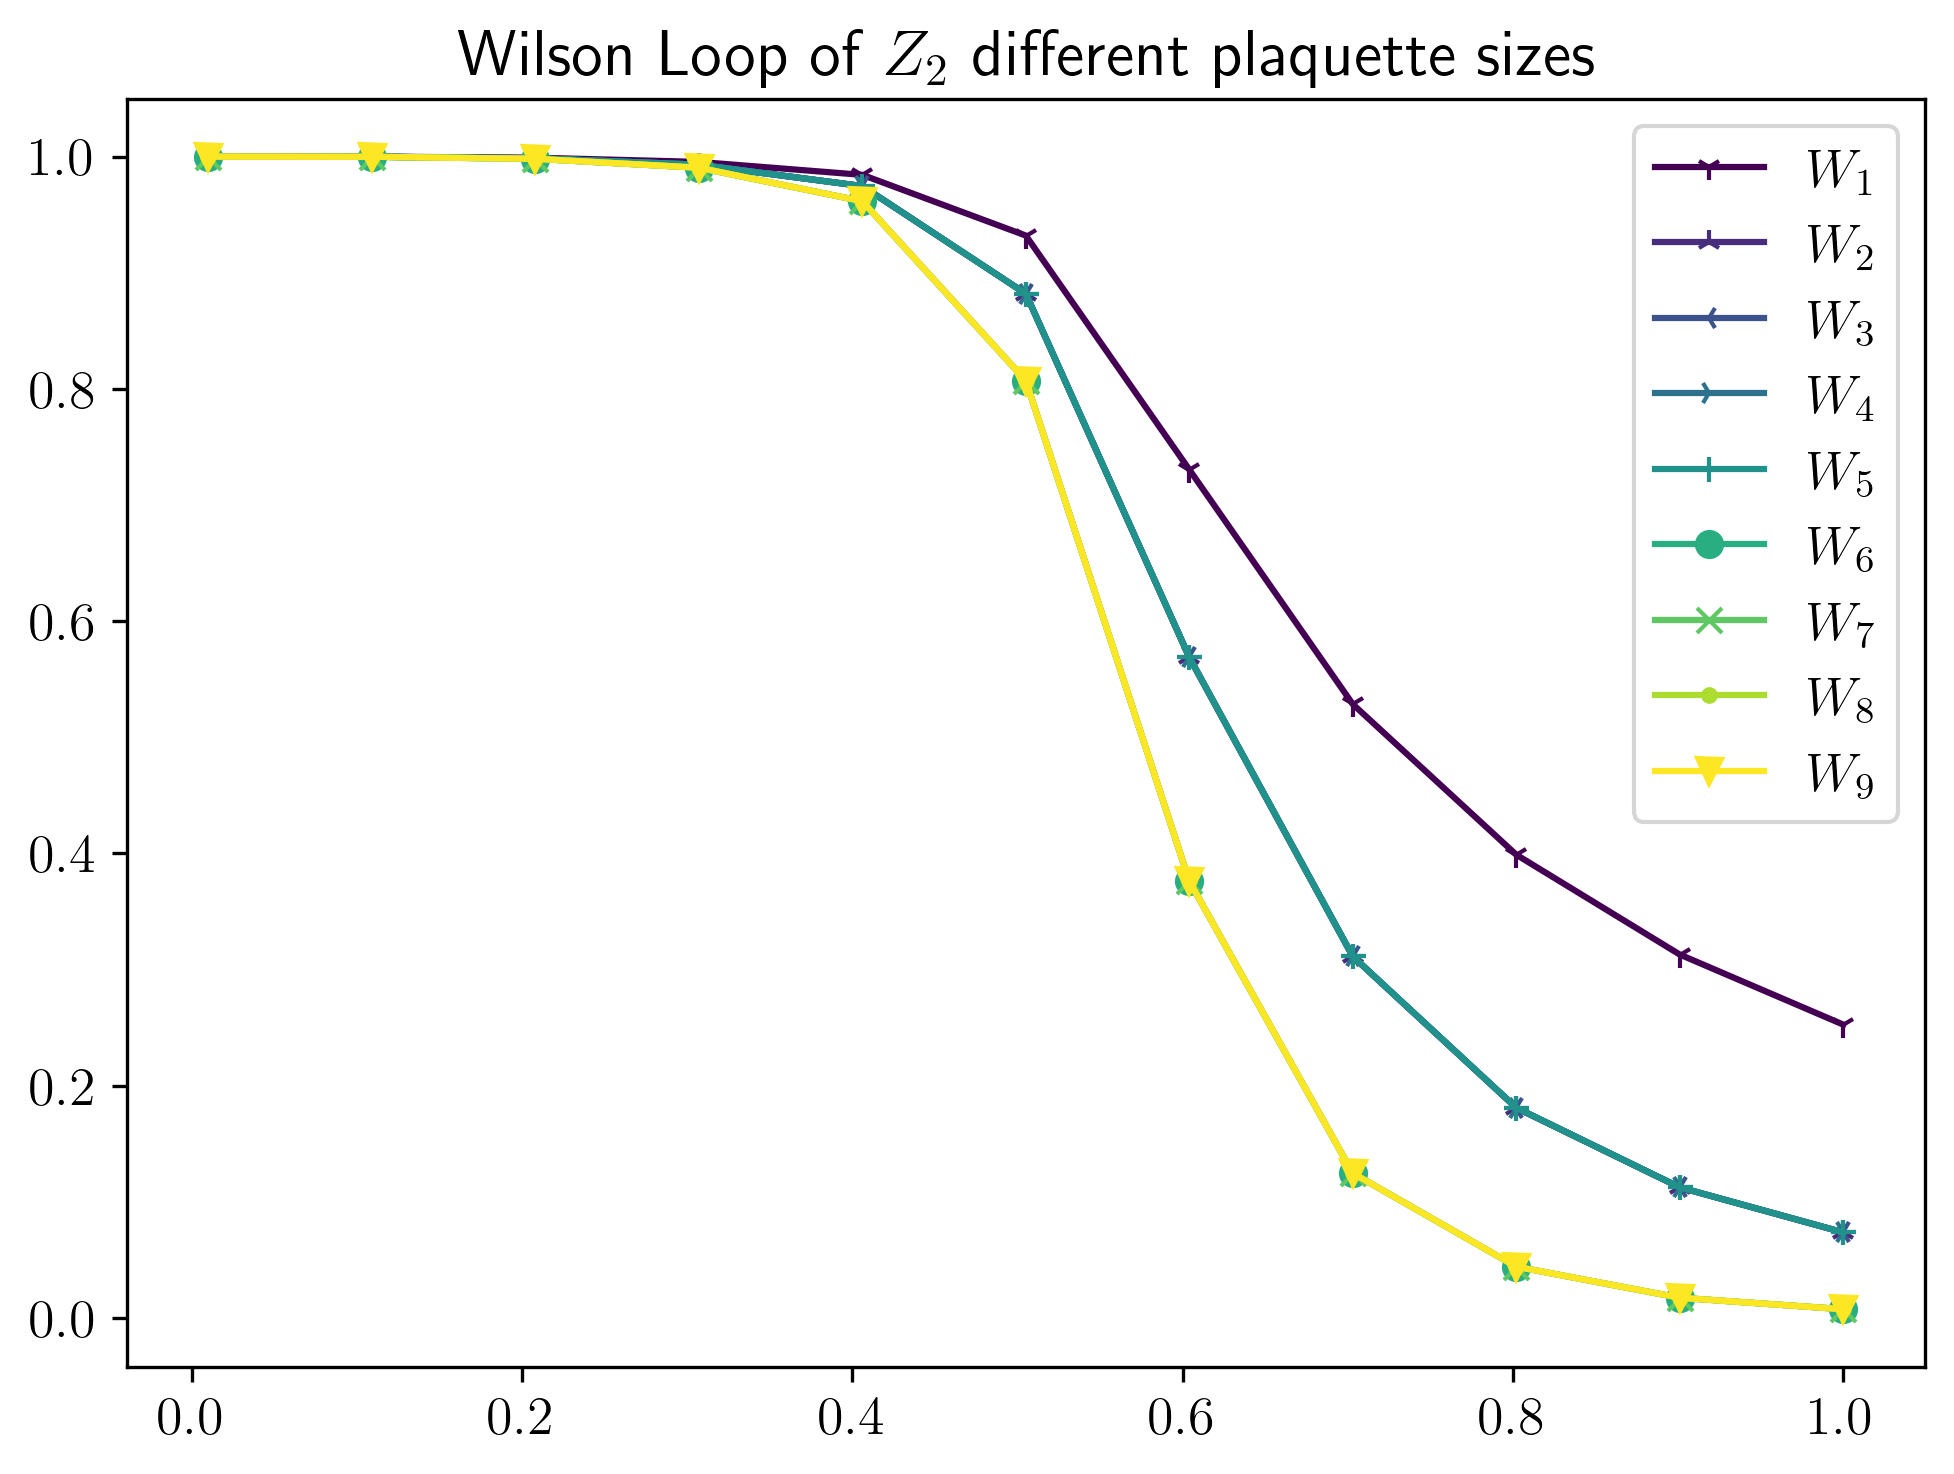

In [91]:
# lxs = [[3],[3],[3,4],[3],[2,3],[2,3],[3,4],[2,3],[3,4]]
# lys = [[3],[2,3],[3],[3,4],[3],[2,3],[2,3],[3,4],[3,4]]
loops_sites = [([2],[2]),
               ([2],[1,2]),
               ([2],[2,3]),
               ([1,2],[2]),
               ([2,3],[2]),
               ([1,2],[1,2]),
               ([2,3],[1,2]),
               ([1,2],[2,3]),
               ([2,3],[2,3])]
Ls = [5]*len(lxs)
h_i = 0.01
h_f = 1.0
npoints = 11
chis = [32]*len(lxs)
loops = plot_wilson_loop(Ls, chis, h_i, h_f, npoints, loops_sites)

### Creutz Ratio

In [118]:
def load_loop(L, chi, loop_sites):
    lx, ly = loop_sites
    l = L
    def loop_fn(**kwparams):
        h_i = kwparams.get('h_i')
        h_f = kwparams.get('h_f')
        npoints = kwparams.get('npoints')
        cx = kwparams.get('cx', None)
        cy = kwparams.get('cy', None)
        sector = kwparams.get('sector', 'vacuum_sector')
        return np.load(f"{parent_path}/results/wilson_loops/wilson_loop_first_moment_{lx}-{ly}_Z2_dual_direct_lattice_{l}x{L}_{sector}_bc_{boundcond}_{cx}-{cy}_h_{h_i}-{h_f}_delta_{npoints}_chi_{chi}.npy")
    return loop_fn

def creutz_ratio(L, chi, loop_sites, dir_x, dir_y):
    lx, ly = loop_sites
    if dir_x == +1:
        lx_ext = lx + [lx[-1]+1]
    else:
        lx_ext = [lx[0] - 1] + lx
    if dir_y == +1:
        ly_ext = ly + [ly[-1]+1]
    else:
        ly_ext = [ly[0] - 1] + ly

    loop1 = load_loop(L, chi, (lx, ly))
    loop2 = load_loop(L, chi, (lx_ext, ly_ext))
    loop3 = load_loop(L, chi, (lx_ext, ly))
    loop4 = load_loop(L, chi, (lx, ly_ext))
    def creutz_fn(**kwparams):
        return -np.log(loop1(**kwparams) * loop2(**kwparams) / (loop3(**kwparams) * loop4(**kwparams)))
    return creutz_fn

def plot_creutz_ratio(L, chi, loop_sites, dir_x, dir_y, params: dict, *args, **kwargs):
    ratio = creutz_ratio(L, chi, loop_sites, dir_x, dir_y)(**params)
    hs = np.linspace(params.get('h_i'), params.get('h_f'), params.get('npoints'))
    plt.plot(hs, ratio, *args, **kwargs)
    plt.legend()

In [119]:
L = 5
chi = 32
loop_sites = ([2],[2])

params = dict(h_i=h_i, h_f=h_f, npoints=npoints)


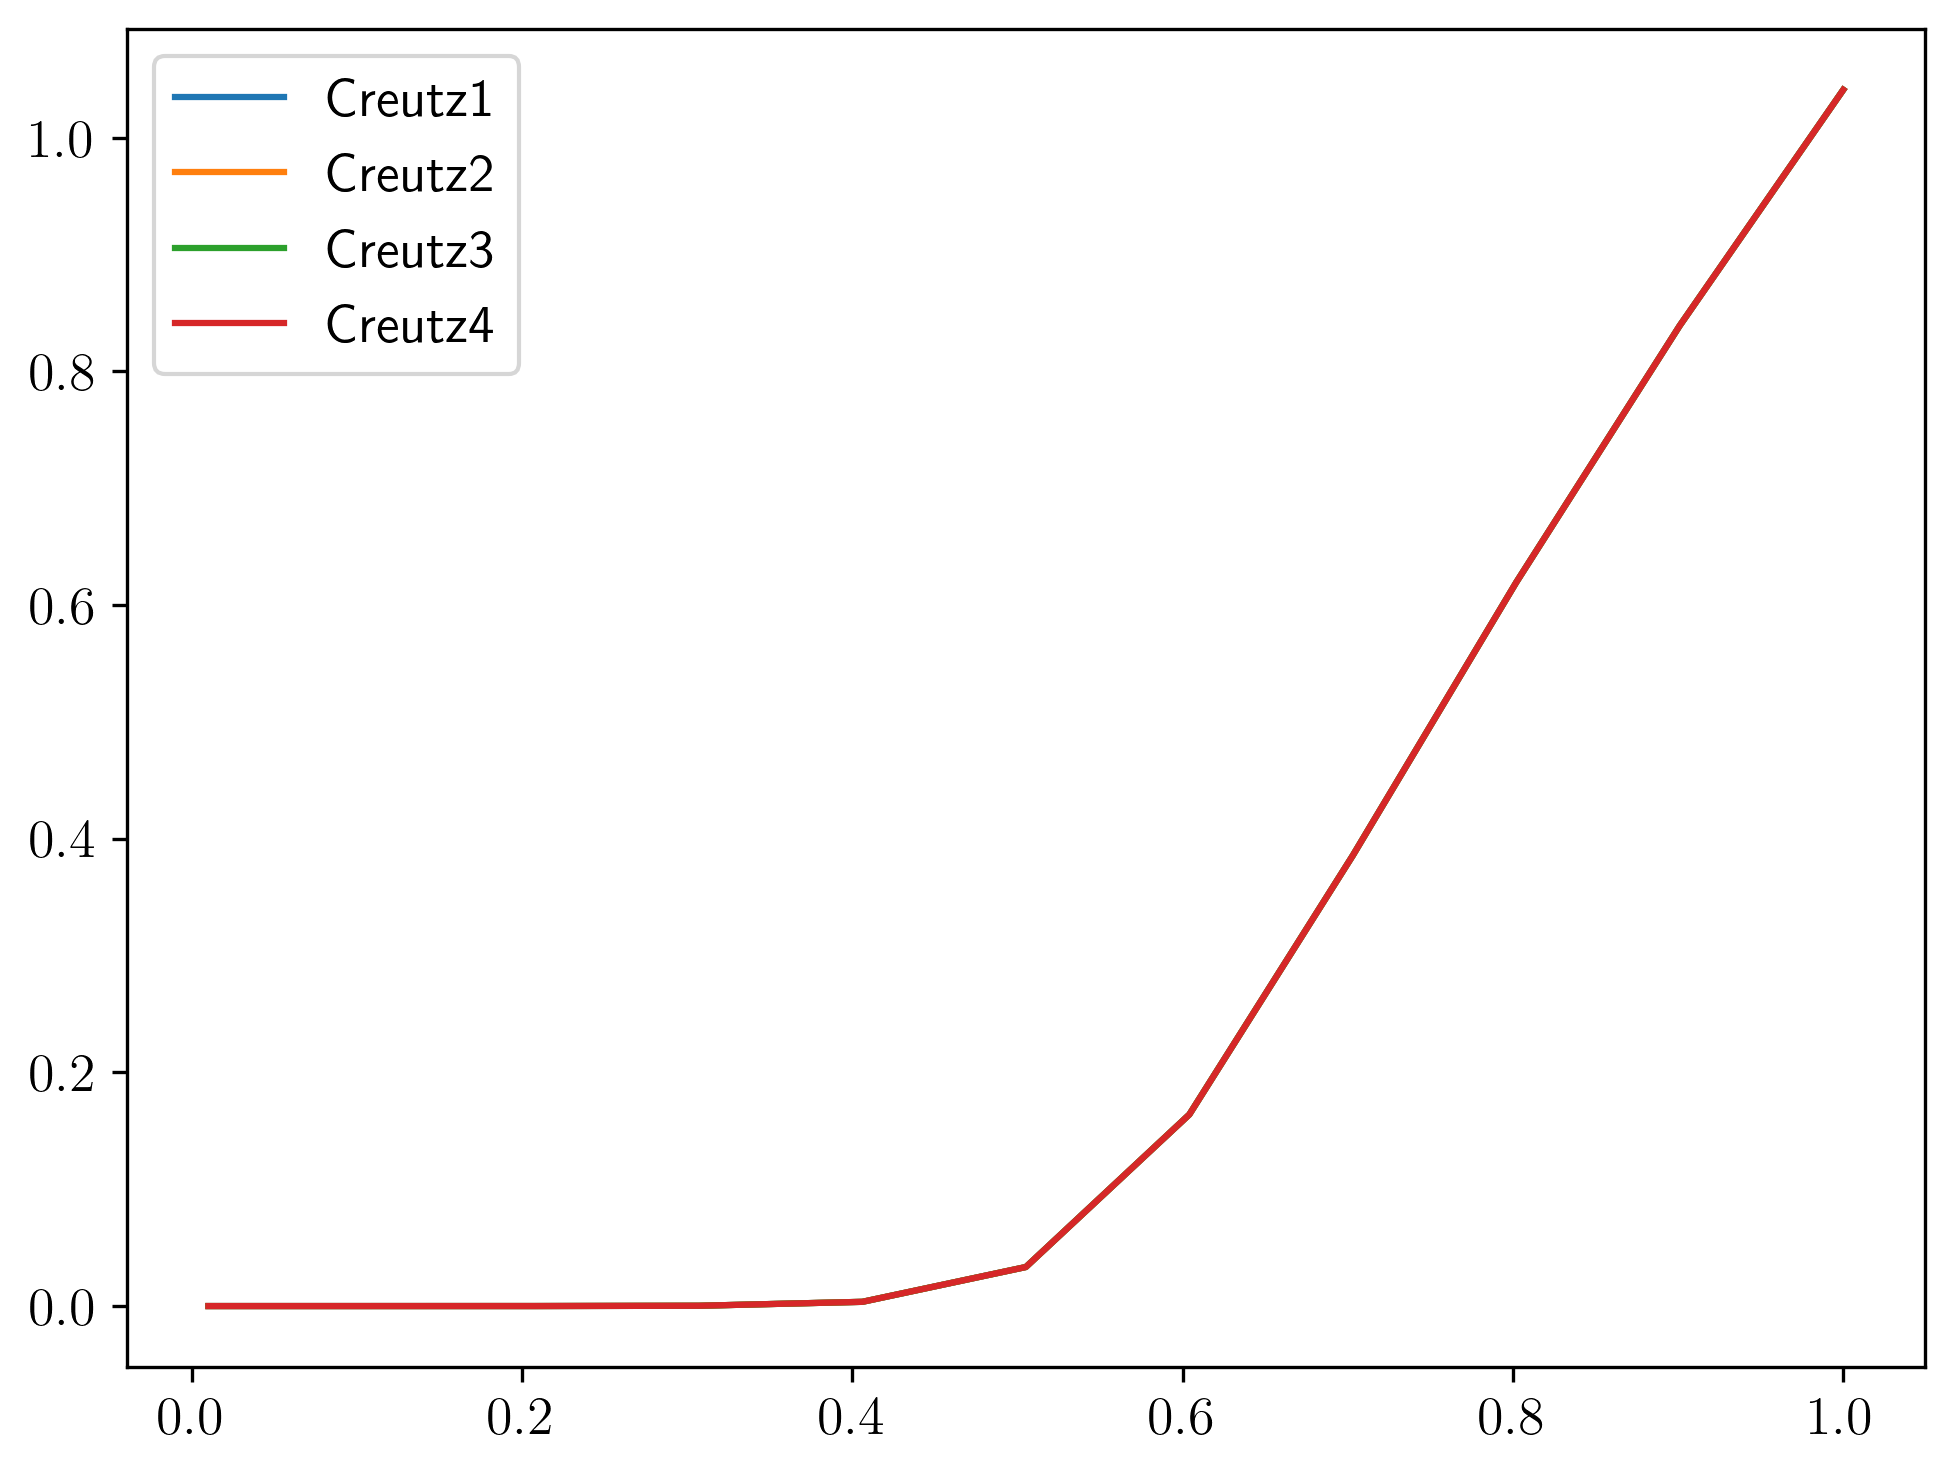

In [121]:
plot_creutz_ratio(L=L, chi=chi, loop_sites=loop_sites, dir_x=1, dir_y=1, params=params, label="Creutz1")
plot_creutz_ratio(L=L, chi=chi, loop_sites=loop_sites, dir_x=1, dir_y=-1, params=params, label="Creutz2")
plot_creutz_ratio(L=L, chi=chi, loop_sites=loop_sites, dir_x=-1, dir_y=1, params=params, label="Creutz3")
plot_creutz_ratio(L=L, chi=chi, loop_sites=loop_sites, dir_x=-1, dir_y=-1, params=params, label="Creutz4")

### Dual Magnetization

In [5]:
def plot_derivative_dual_mag_lattices(Ls, chis, h_i, h_f, npoints):
    colors = create_sequential_colors(len(chis))
    i = 0
    max_vals = []
    x_vals = []
    hs = np.linspace(h_i,h_f,npoints)
    cx = None
    cy = None
    if cx == None:
        sector = "vacuum_sector"
    else:
        sector = f"{len(cx)}_particle(s)_sector"
    parent_path="/Users/fradm98/Google Drive/My Drive/projects/1_Z2"

    for L, chi in zip(Ls, chis):
        l = L
        string = np.load(f"{parent_path}/results/mag_data/dual_mag_first_moment_Z2_dual_direct_lattice_{l}x{L}_{sector}_bc_{boundcond}_{cx}-{cy}_h_{h_i}-{h_f}_delta_{npoints}_chi_{chi}.npy")
        d_string_dh = np.gradient(string, hs)
        idx_max = np.argmax(d_string_dh)
        max_vals.append(np.max(d_string_dh))
        x_vals.append(hs[idx_max])
        plt.plot(hs, string, color=colors[i], linestyle='--', label=f"${l}$x${L}$; $\chi={chi}$")
        plt.plot(hs, d_string_dh, color=colors[i], label=f"${l}$x${L}$; $\chi={chi}$ Der")
        i += 1
    plt.scatter(x_vals, max_vals, marker='o', facecolors="white", edgecolors="red")
    plt.title(f"Derivative of dual Magnetization of $Z_2$ different lattice sizes")
    plt.savefig(f"{parent_path}/figures/magnetization/dual_mag_derivative_first_moment_Z2_dual_direct_lattice_{Ls}x{Ls}_{sector}_bc_{boundcond}_{cx}-{cy}_h_{h_i}-{h_f}_delta_{npoints}_chi_{chis}.png")

    plt.legend();
    return max_vals, x_vals, d_string_dh

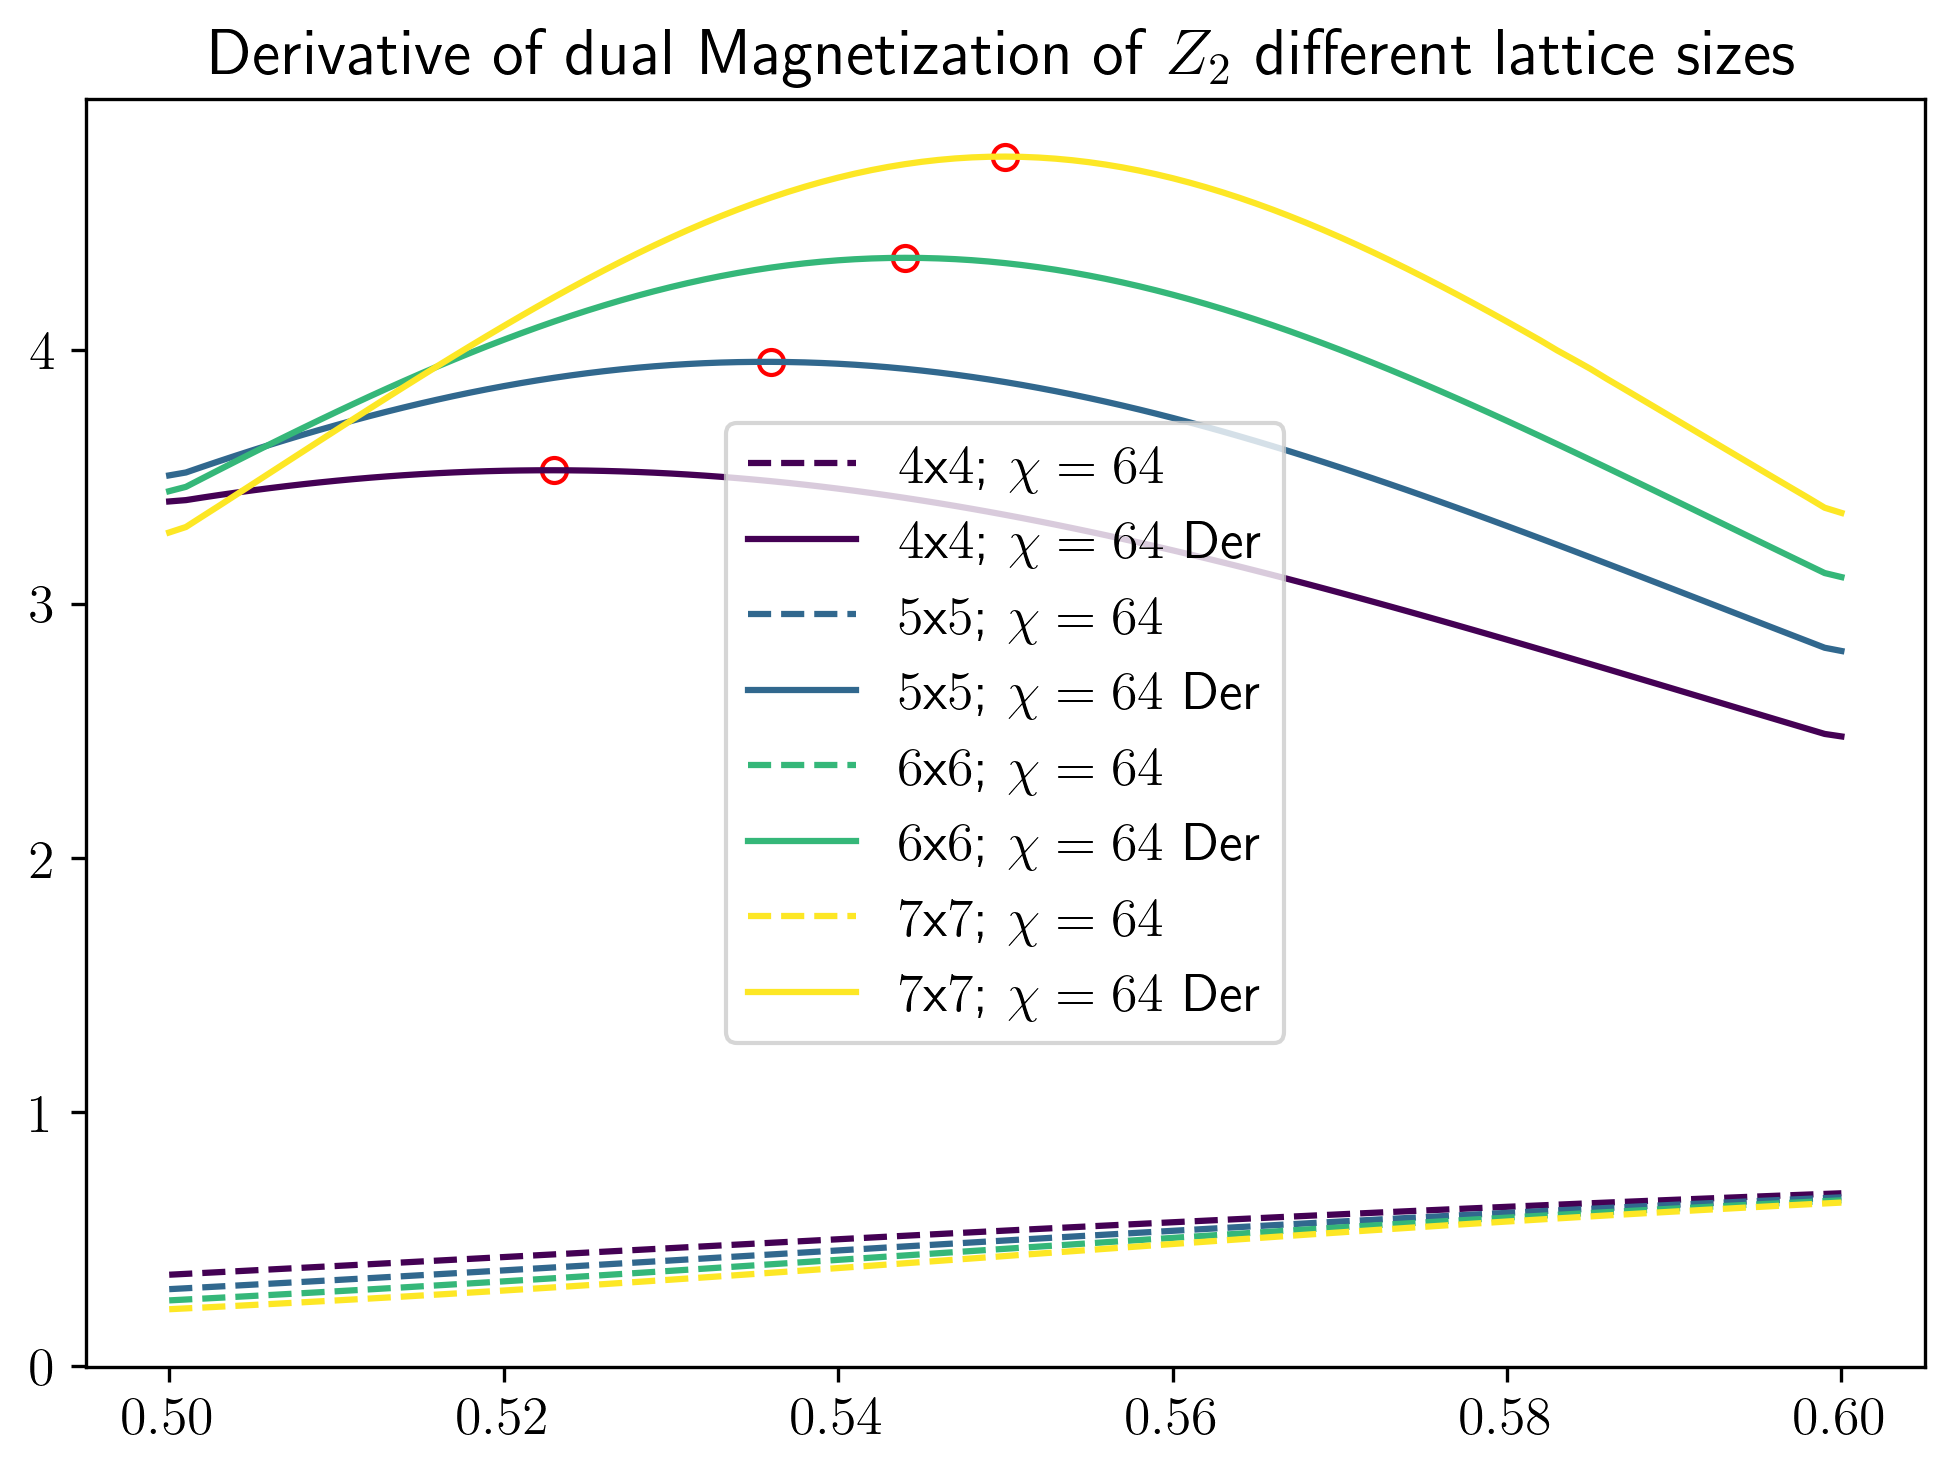

In [14]:
Ls = [4,5,6,7]
chis = [64,64,64,64]
h_i = 0.5
h_f = 0.6
npoints = 101
x_err = (h_f - h_i)/npoints
max_vals, x_vals, d_mag_dh = plot_derivative_dual_mag_lattices(Ls, chis, h_i, h_f, npoints)

In [15]:
def pow_law(L,b,c,x):
    return b + c*(L**x)

In [16]:
x_vals_err = np.array([x_err]*len(x_vals))
powp, powc = curve_fit(pow_law, Ls, x_vals, sigma=x_vals_err, absolute_sigma=True, bounds=([0,-np.inf,-2],[1,np.inf,np.inf]))
perr = np.sqrt(np.diag(powc))
print(f"Critical g: {powp[0]} +/- {perr[0]}")
print(f"nu: {-1/powp[2]} +/- {(1/(powp[2]-perr[2]) - 1/(powp[2]+perr[2]))/2}")

print("Parameter uncertainties:", perr)

Critical g: 0.5792658525672468 +/- 0.021863644418290695
nu: 0.8600622286989926 +/- 0.6291493117888874
Parameter uncertainties: [0.02186364 0.1334401  0.61363423]


In [17]:
g_th = 1/np.sqrt(3.044)

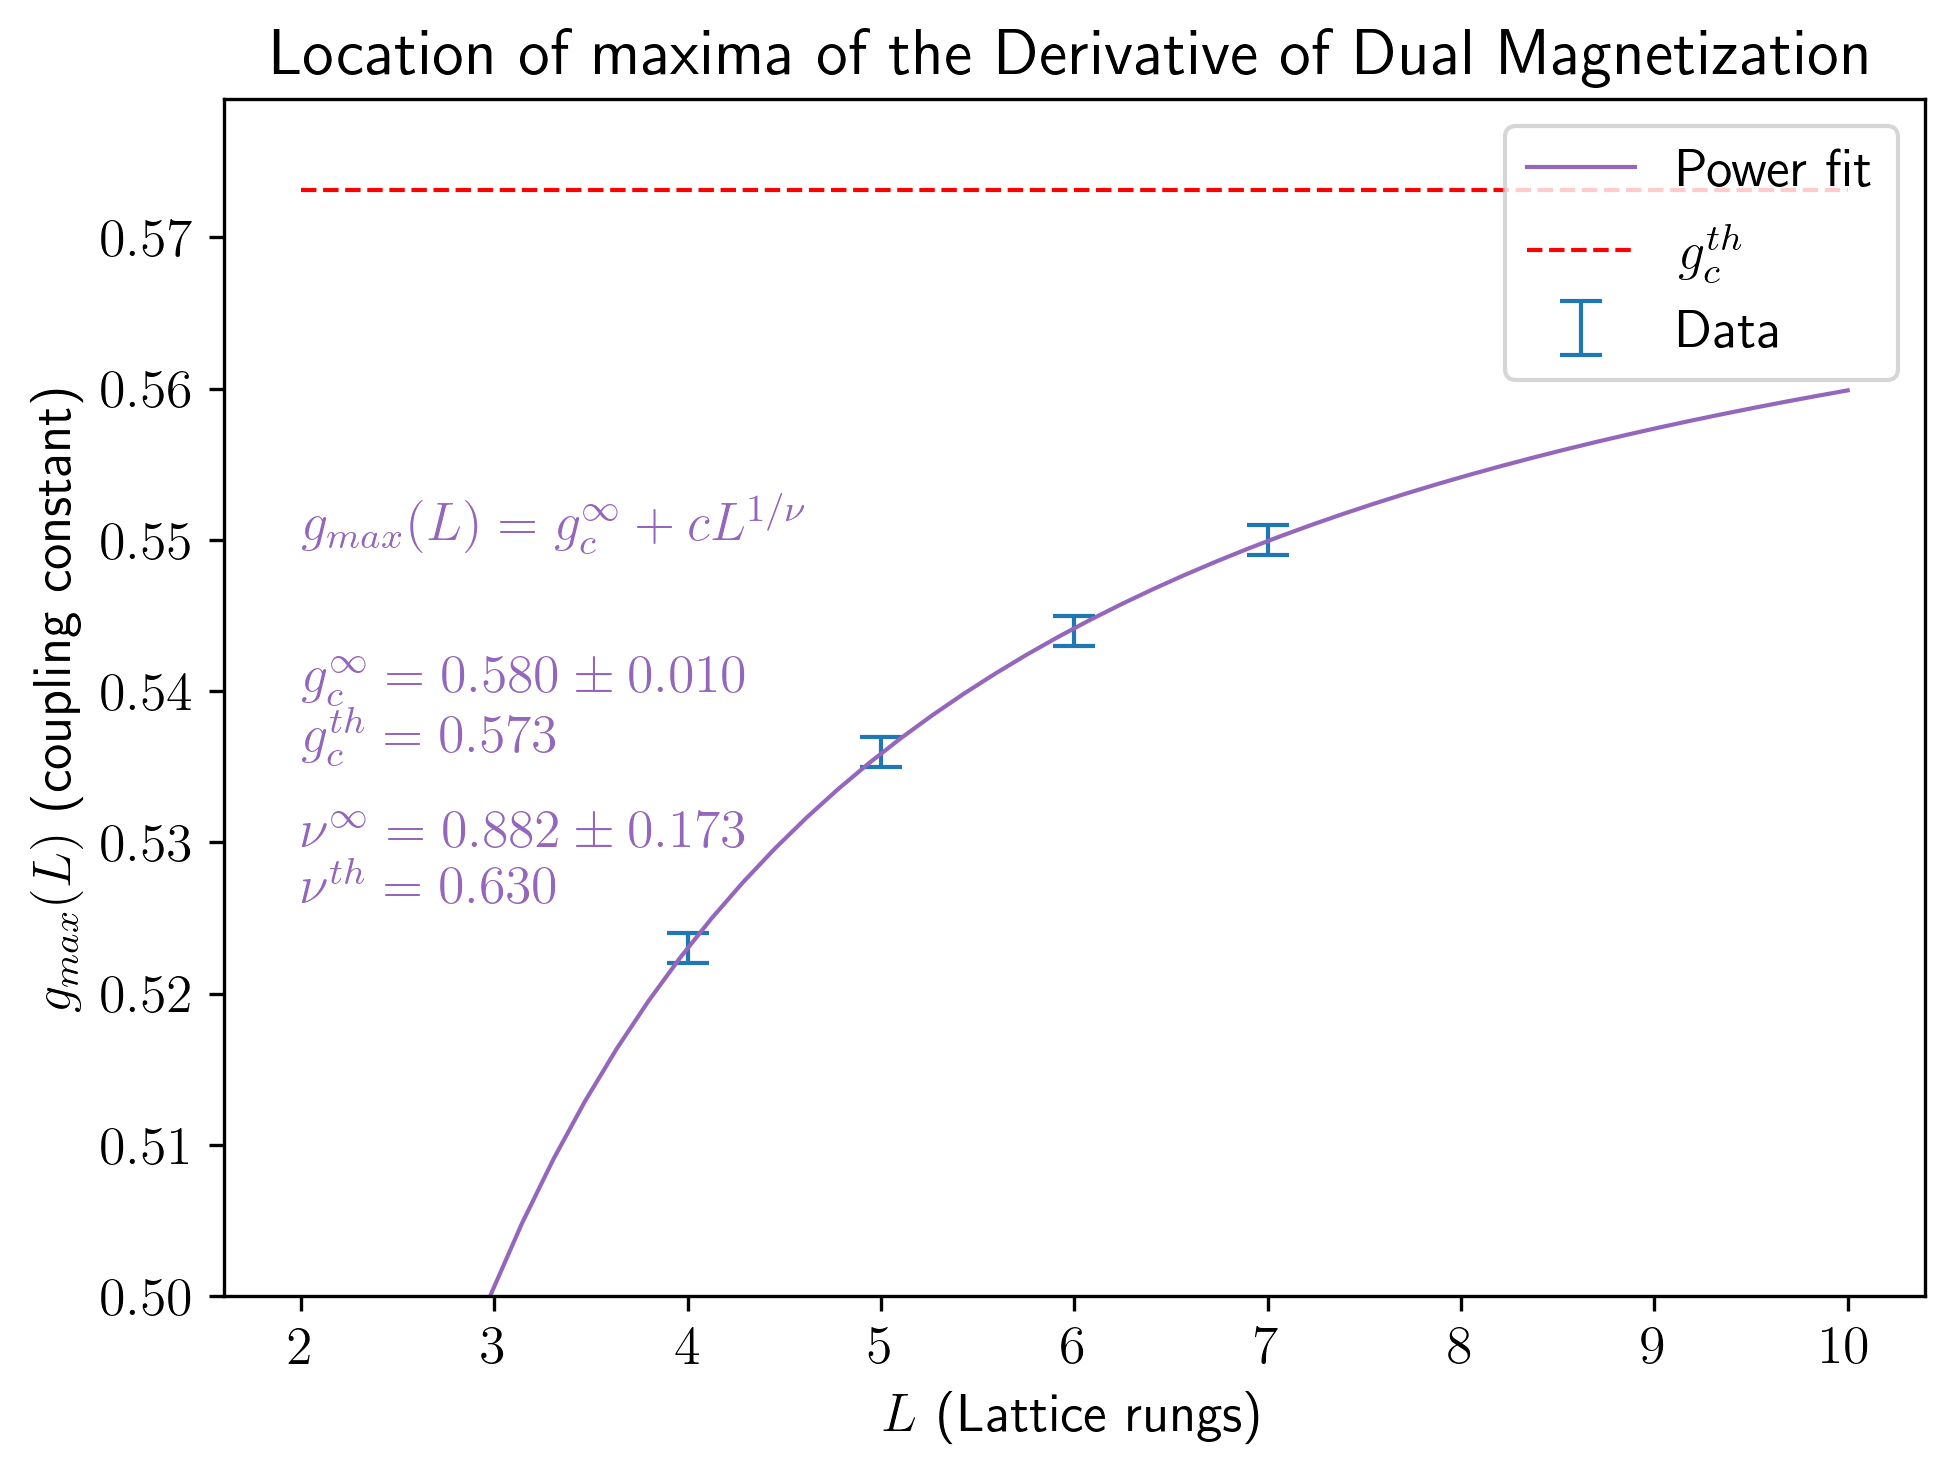

In [18]:
plt.errorbar(Ls, x_vals, yerr=x_err, elinewidth=1, capsize=5, barsabove=True, linewidth=0, color='C0', label="Data")
x = np.linspace(2,10)
plt.plot(x, pow_law(x,powp[0],powp[1],powp[2]), linewidth=1, color='C4', label="Power fit")
plt.hlines(y=g_th, xmin=2, xmax=10, linestyles='--', linewidth=1, colors='red', label="$g_c^{th}$")

plt.text(x=2, y=0.55, s="$g_{max}(L)=g_c^{\\infty} + cL^{1/\\nu}$", color='C4')
plt.text(x=2, y=0.54, s="$g_c^{\\infty} = 0.580 \\pm 0.010$", color='C4')
plt.text(x=2, y=0.536, s="$g_c^{th} = 0.573$", color='C4')
plt.text(x=2, y=0.53, s="$\\nu^{\\infty} = 0.882 \\pm 0.173$", color='C4')
plt.text(x=2, y=0.526, s="$\\nu^{th} = 0.630$", color='C4')
plt.title("Location of maxima of the Derivative of Dual Magnetization")
plt.xlabel("$L$ (Lattice rungs)")
plt.ylabel("$g_{max}(L)$ (coupling constant)")
plt.ylim(0.5)
plt.legend()

### 6. Susceptibility

In [24]:
def plot_susceptibility_dual_mag_lattices(Ls, chis, h_i, h_f, npoints):
    colors = create_sequential_colors(len(chis))
    i = 0
    max_vals = []
    x_vals = []
    hs = np.linspace(h_i,h_f,npoints)
    cx = None
    cy = None
    if cx == None:
        sector = "vacuum_sector"
    else:
        sector = f"{len(cx)}_particle(s)_sector"
    parent_path="/Users/fradm98/Google Drive/My Drive/projects/1_Z2"

    for L, chi in zip(Ls, chis):
        l = L
        string = np.load(f"{parent_path}/results/mag_data/dual_mag_first_moment_Z2_dual_direct_lattice_{l}x{L}_{sector}bc_{boundcond}__{cx}-{cy}_h_{h_i}-{h_f}_delta_{npoints}_chi_{chi}.npy")
        string_2 = np.load(f"{parent_path}/results/mag_data/dual_mag_second_moment_Z2_dual_direct_lattice_{l}x{L}_{sector}bc_{boundcond}__{cx}-{cy}_h_{h_i}-{h_f}_delta_{npoints}_chi_{chi}.npy")
        sus = np.abs(string_2 - (string**2))
        idx_max = np.argmax(sus)
        max_vals.append(np.max(sus))
        x_vals.append(hs[idx_max])
        plt.plot(hs, sus, color=colors[i], linestyle='--', label=f"${l}$x${L}$; $\chi={chi}$")
        i += 1
    plt.scatter(x_vals, max_vals, marker='o', facecolors="white", edgecolors="red")
    plt.title(f"Susceptibility of dual Magnetization of $Z_2$ different lattice sizes")
    plt.savefig(f"{parent_path}/figures/magnetization/susceptibility_dual_mag_Z2_dual_direct_lattice_{Ls}x{Ls}_{sector}bc_{boundcond}__{cx}-{cy}_h_{h_i}-{h_f}_delta_{npoints}_chi_{chis}.png")

    plt.legend();
    return max_vals, x_vals, sus

In [ ]:
Ls = [4,5,6,7]
chis = [64,64,64,64]
h_i = 0.01
h_f = 1.0
npoints = 101
max_vals, x_vals, d_mag_dh = plot_susceptibility_dual_mag_lattices(Ls, chis, h_i, h_f, npoints)

In [27]:
powp, powc = curve_fit(pow_law, x_vals, Ls, maxfev=2000)
print(f"Critical g: {powp[0]}")
print(f"nu: {-1/powp[2]}")

Critical g: -46.23356719136995
nu: -0.5171178604828178
